# Zadanie 1: Klasyfikator Bayesowski

## Dane
- **Klasa 1**  
  Prawdopodobieństwo a priori: $p_1 = 0.5$  
  Funkcja gęstości prawdopodobieństwa:  
  $$
  f_1(x) = \begin{cases}
  -2x + 2 & \text{dla } x \in [0, 1] \\
  0 & \text{poza przedziałem}
  \end{cases}
  $$

- **Klasa 2**  
  Prawdopodobieństwo a priori: $p_2 = 0.5$  
  Funkcja gęstości prawdopodobieństwa:  
  $$
  f_2(x) = \begin{cases}
  0.5 & \text{dla } x \in [0.75, 2.75] \\
  0 & \text{poza przedziałem}
  \end{cases}
  $$

## Rozwiązanie
 $f_1(x) = f_2(x)$.

#### Analiza funkcji gęstości
- Dla $x \in [0, 1]$:  
  $$
  f_1(x) = -2x + 2
  $$
- Dla $x \in [0.75, 2.75]$:  
  $$
  f_2(x) = 0.5
  $$

$$
-2x + 2 = 0.5
$$
Rozwiązanie:
$$
-2x = -1.5 \quad \Rightarrow \quad x = 0.75
$$

- Dla $x = 0.75$: $f_1(0.75) = f_2(0.75) = 0.5$  
- Dla $x > 0.75$ (np. $x=0.8$): $f_1(0.8) = 0.4$, a $f_2(0.8) = 0.5$ — tutaj $f_2(x) > f_1(x)$.

#### Wnioski:
- **Klasa 1**: $x \in [0, 0.75]$  
- **Klasa 2**: $x \in (0.75, 2.75]$

### Krok 3: Obliczenie ryzyka bayesowskiego
Ryzyko bayesowskie jest równe prawdopodobieństwu popełnienia błędu klasyfikacji:
$$
R = P(\text{błąd}) = p_1 \int_{R_2} f_1(x) \, dx + p_2 \int_{R_1} f_2(x) \, dx
$$
gdzie:
- $R_1 = [0, 0.75]$ — obszar przypisany Klasie 1
- $R_2 = (0.75, 2.75]$ — obszar przypisany Klasie 2

#### Częściowe obliczenia:
1. **Błąd przypisania Klasy 1 do obszaru $R_2$**:
   $$
   \int_{0.75}^{1} (-2x + 2) \, dx
   $$
   Przeciwnik całkowania:
   $$
   \int (-2x + 2) \, dx = -x^2 + 2x
   $$
   Licząc:
   $$
   \left[ -x^2 + 2x \right]_{0.75}^{1} = (-1 + 2) - (-0.5625 + 1.5) = 1 - 0.9375 = 0.0625
   $$
   Uwzględniając wagę:
   $$
   0.5 \times 0.0625 = 0.03125
   $$

2. **Błąd przypisania Klasy 2 do obszaru $R_1$**:  
   Funkcja $f_2(x)$ w $[0, 0.75]$ jest równa zero, więc:
   $$
   \int_0^{0.75} 0 \, dx = 0
   $$

#### Zatem:
$$
R = 0.03125
$$

### Krok 4: Prawdopodobieństwo poprawnej klasyfikacji
Prawdopodobieństwo poprawnej decyzji to:
$$
P(\text{poprawna}) = 1 - R = 1 - 0.03125 = 0.96875
$$

## Wyniki
- **Ryzyko bayesowskie (prawdopodobieństwo błędu)**: $R = 0.03125$ (czyli 3.125%)  
- **Prawdopodobieństwo poprawnej klasyfikacji**: $P(\text{poprawna}) = 0.96875$ (czyli 96.875%)


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
data = pd.read_csv('samples.csv')

theoretical_accuracy = 0.96875
theoretical_error = 0.03125

print(data.head())

X = data['samples'].values.reshape(-1, 1)  # Jednowymiarowa cecha, reshaping dla sklearn
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Funkcje gęstości prawdopodobieństwa
def f1(x):
    if 0 <= x <= 1:
        return -2 * x + 2
    return 0

def f2(x):
    if 0.75 <= x <= 2.75:
        return 0.5
    return 0

p1 = 0.5
p2 = 0.5

y_pred_bayes = []
for x in X_test.flatten():
    if f1(x) * p1 >= f2(x) * p2:
        y_pred_bayes.append(1)
    else:
        y_pred_bayes.append(2)

y_pred_bayes = np.array(y_pred_bayes)
bayes_accuracy = accuracy_score(y_test, y_pred_bayes)
error_rate = 1 - bayes_accuracy


import pandas as pd
data = {
    "Miara": [
        "Liczba próbek (cały zbiór)",
        "Liczba próbek (zbiór testowy)",
        "Dokładność klasyfikacji (empiryczna)",
        "Empiryczne ryzyko błędnej klasyfikacji",
        "Teoretyczna dokładność",
        "Teoretyczne ryzyko błędnej klasyfikacji",
        "Różnica w dokładności (empiryczna - teoretyczna)",
        "Różnica w ryzyku (empiryczna - teoretyczna)"
    ],
    "Wartość": [
        len(X),
        len(X_test),
        f"{bayes_accuracy:.5f} ({bayes_accuracy*100:.2f}%)",
        f"{error_rate:.5f} ({error_rate*100:.2f}%)",
        f"{theoretical_accuracy:.5f} ({theoretical_accuracy*100:.2f}%)",
        f"{theoretical_error:.5f} ({theoretical_error*100:.2f}%)",
        f"{(bayes_accuracy - theoretical_accuracy):.5f}",
        f"{(error_rate - theoretical_error):.5f}"
    ]
}
df_results = pd.DataFrame(data)
display(df_results)


    samples  class
0  0.109903    1.0
1  0.517046    1.0
2  0.063264    1.0
3  0.587621    1.0
4  0.108782    1.0


Miara           Wartość
0                        Liczba próbek (cały zbiór)             10000
1                     Liczba próbek (zbiór testowy)              2000
2              Dokładność klasyfikacji (empiryczna)  0.96950 (96.95%)
3            Empiryczne ryzyko błędnej klasyfikacji   0.03050 (3.05%)
4                            Teoretyczna dokładność  0.96875 (96.88%)
5           Teoretyczne ryzyko błędnej klasyfikacji   0.03125 (3.12%)
6  Różnica w dokładności (empiryczna - teoretyczna)           0.00075
7       Różnica w ryzyku (empiryczna - teoretyczna)          -0.00075

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)


results_data = {
    "Klasyfikator": [
        "Bayesowski empiryczny",
        "K-Nearest Neighbors",
        "SVM (linear kernel)",
        "Bayesowski teoretyczny"
    ],
    "Dokładność": [
        f"{bayes_accuracy:.5f} ({bayes_accuracy*100:.2f}%)",
        f"{knn_accuracy:.5f} ({knn_accuracy*100:.2f}%)",
        f"{svm_accuracy:.5f} ({svm_accuracy*100:.2f}%)",
        f"{theoretical_accuracy:.5f} ({theoretical_accuracy*100:.2f}%)"
    ]
}

comparison_data = {
    "Klasyfikator": [
        "Bayesowski empiryczny",
        "K-Nearest Neighbors",
        "SVM (linear kernel)"
    ],
    "Różnica względem Bayesa teoretycznego": [
        f"{bayes_accuracy - theoretical_accuracy:.5f}",
        f"{knn_accuracy - theoretical_accuracy:.5f}",
        f"{svm_accuracy - theoretical_accuracy:.5f}"
    ]
}

df_results = pd.DataFrame(results_data)
df_comparison = pd.DataFrame(comparison_data)
print("\nWyniki klasyfikacji (na zbiorze testowym):")
display(df_results)
print("\nPorównanie z teoretycznym klasyfikatorem Bayesa:")
display(df_comparison)

best_classifier = max(
    ("Bayesowski empiryczny", bayes_accuracy),
    ("KNN", knn_accuracy),
    ("SVM", svm_accuracy),
    key=lambda x: x[1]
)

print(f"\nNajlepszy klasyfikator: {best_classifier[0]} z dokładnością {best_classifier[1]:.5f}")
if best_classifier[0] == "Bayesowski empiryczny":
    print("Klasyfikator bayesowski empiryczny okazał się najlepszy.")
elif bayes_accuracy == best_classifier[1]:
    print("Klasyfikator bayesowski empiryczny jest równie dobry jak najlepszy klasyfikator.")
else:
    print("Klasyfikator bayesowski empiryczny nie był najlepszy.")



Wyniki klasyfikacji (na zbiorze testowym):


Klasyfikator        Dokładność
0   Bayesowski empiryczny  0.96950 (96.95%)
1     K-Nearest Neighbors  0.96650 (96.65%)
2     SVM (linear kernel)  0.96850 (96.85%)
3  Bayesowski teoretyczny  0.96875 (96.88%)


Porównanie z teoretycznym klasyfikatorem Bayesa:


Klasyfikator Różnica względem Bayesa teoretycznego
0  Bayesowski empiryczny                               0.00075
1    K-Nearest Neighbors                              -0.00225
2    SVM (linear kernel)                              -0.00025


Najlepszy klasyfikator: Bayesowski empiryczny z dokładnością 0.96950
Klasyfikator bayesowski empiryczny okazał się najlepszy.



Generowanie pairplot dla Iris...


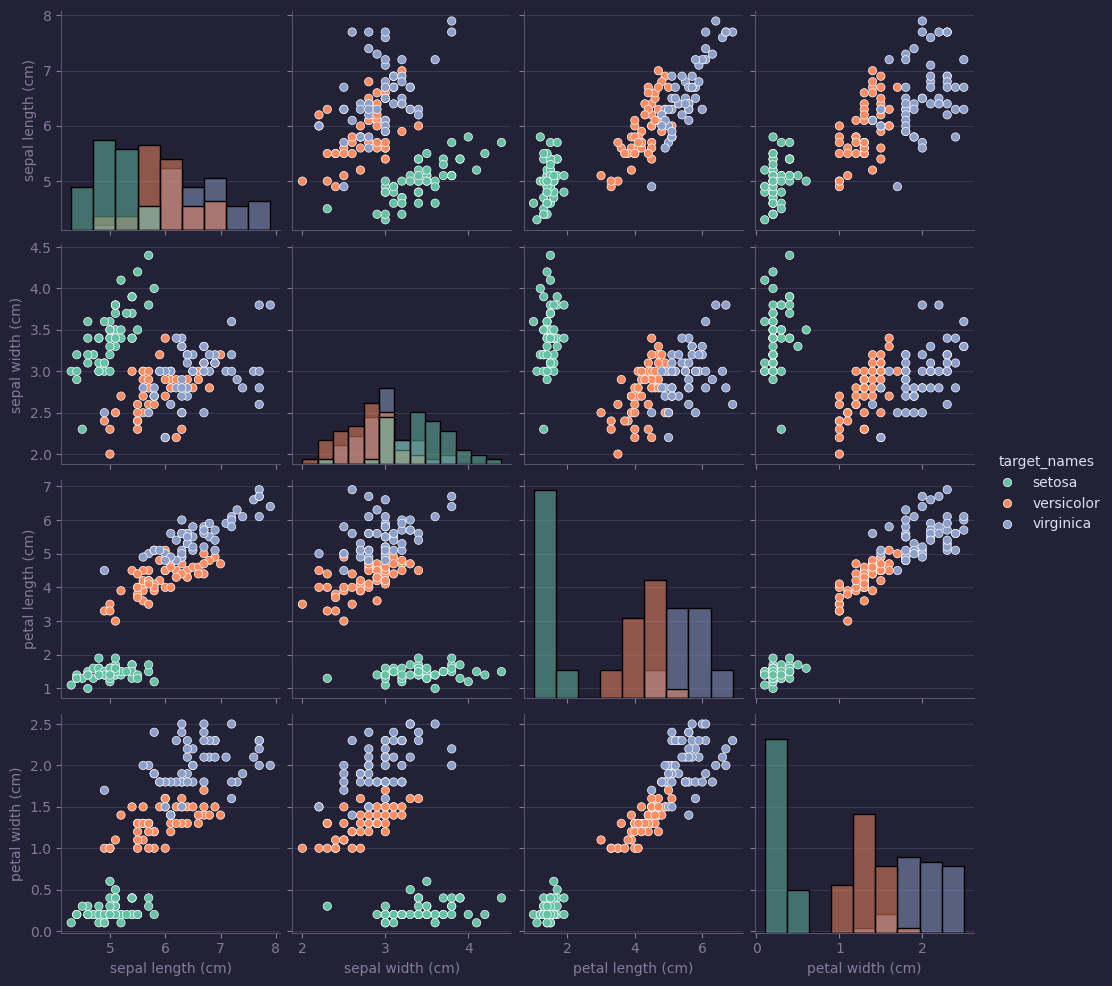

Generowanie macierzy korelacji dla Iris...


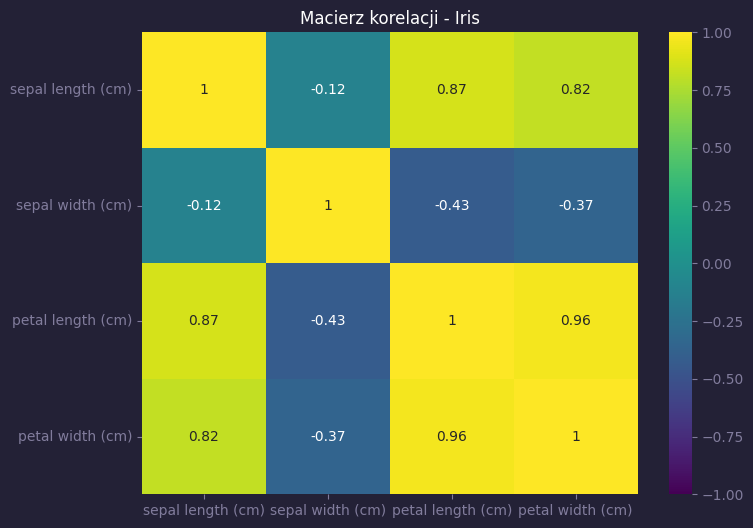

Generowanie histogramów dla Iris...


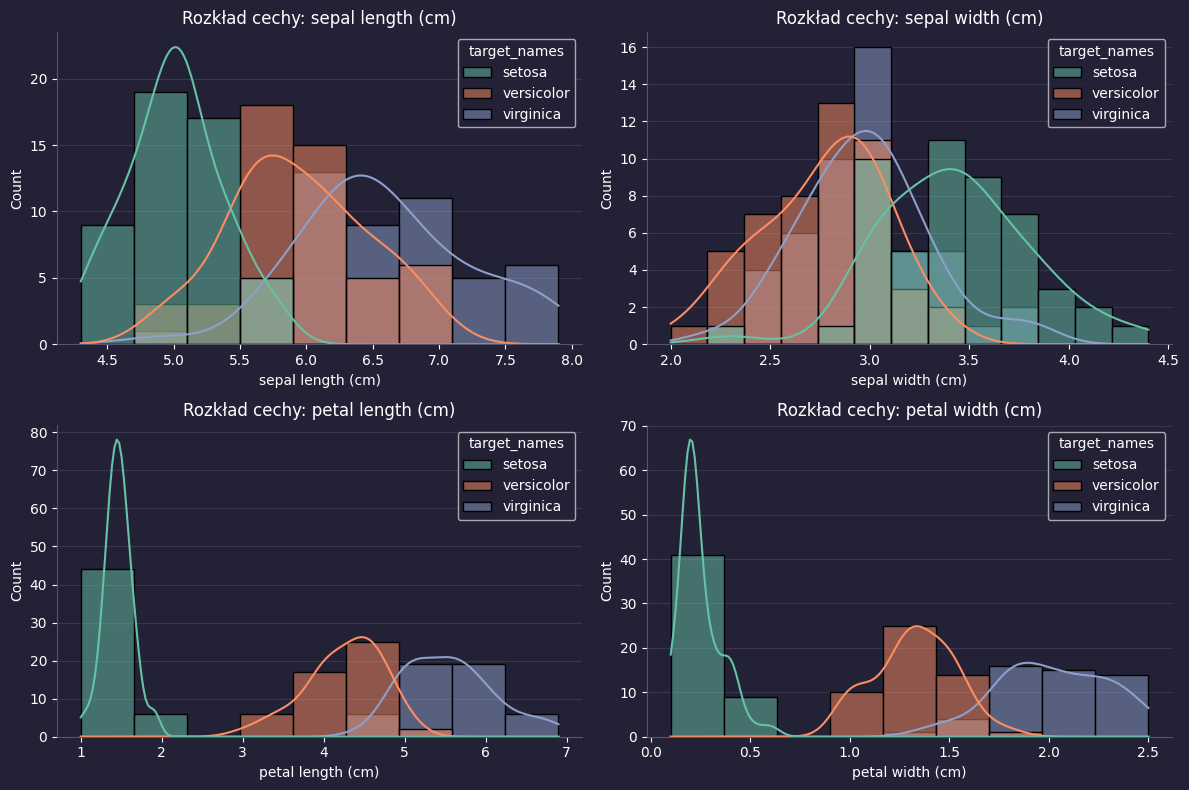

Generowanie wykresów pudełkowych dla Iris...


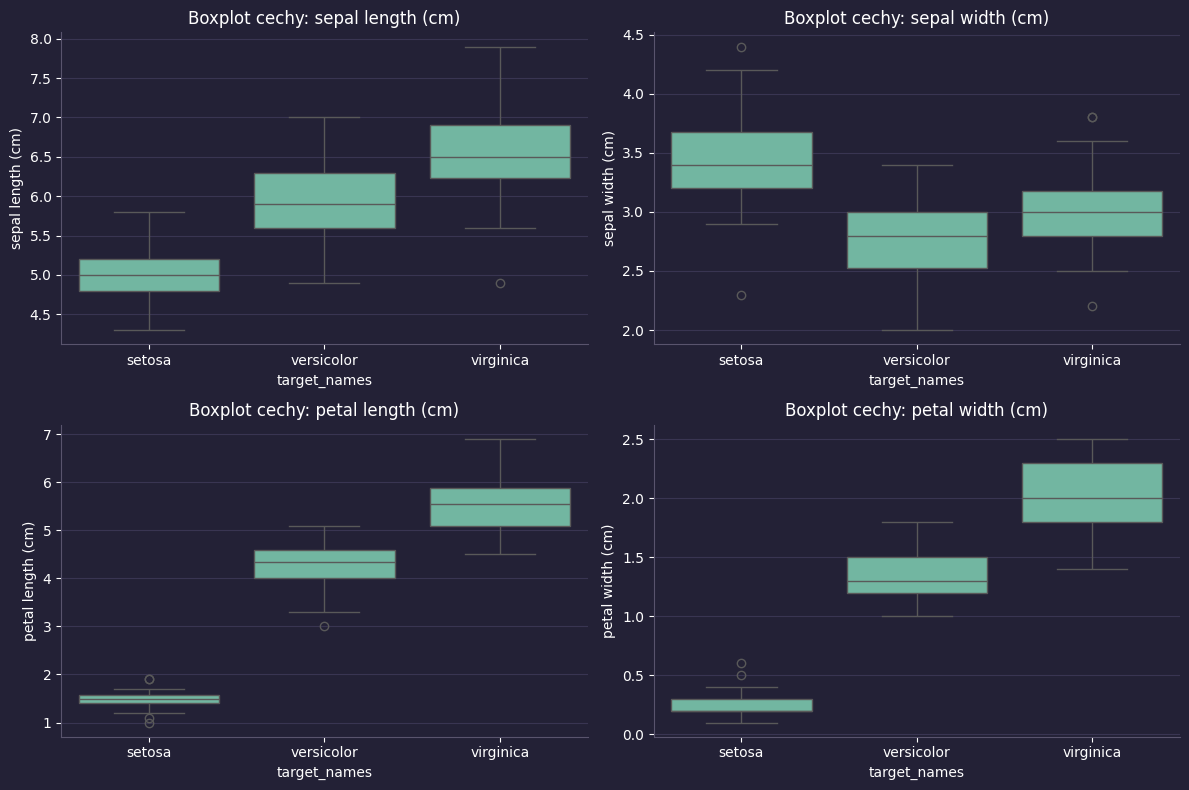


=== Analiza zbioru danych Wine ===



Generowanie pairplot dla Wine (pierwsze 4 cechy)...


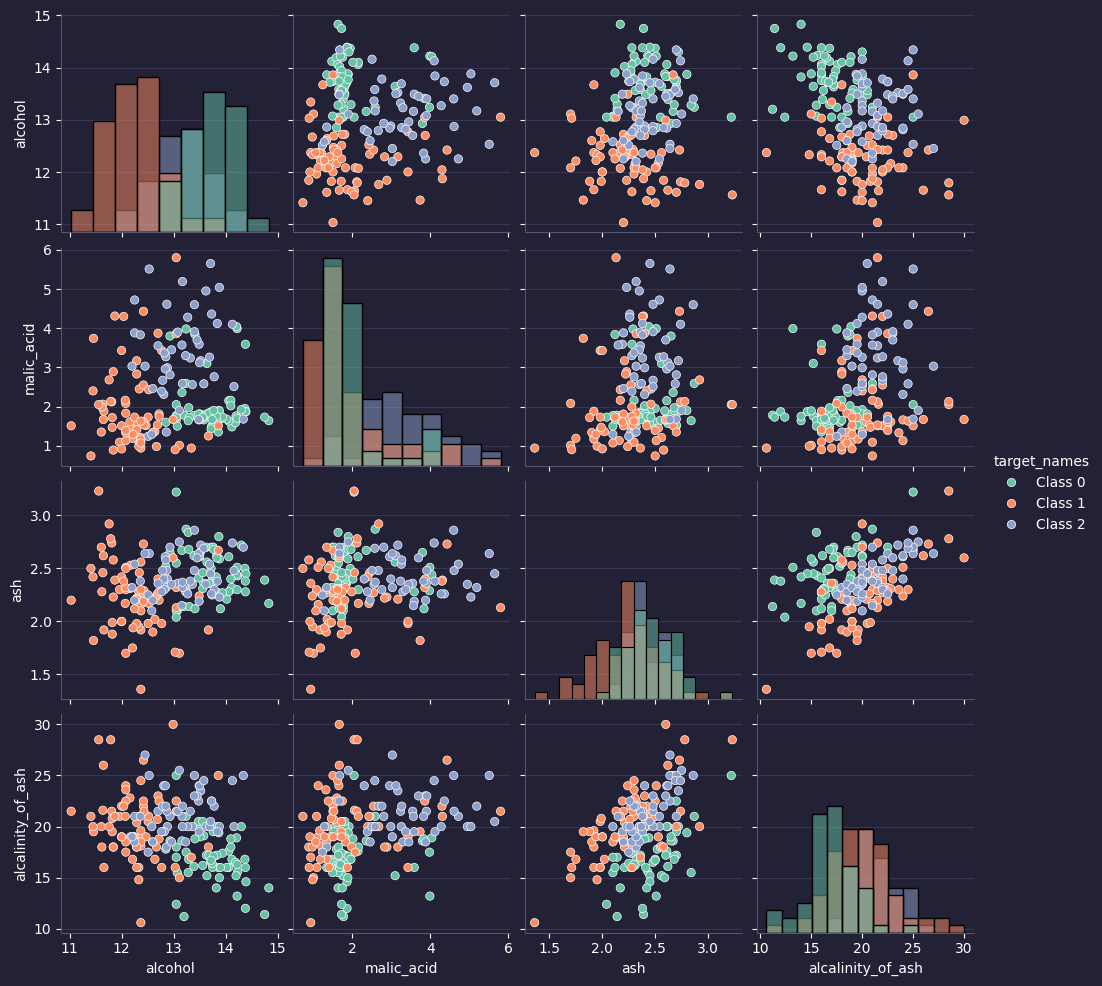

Generowanie macierzy korelacji dla Wine...


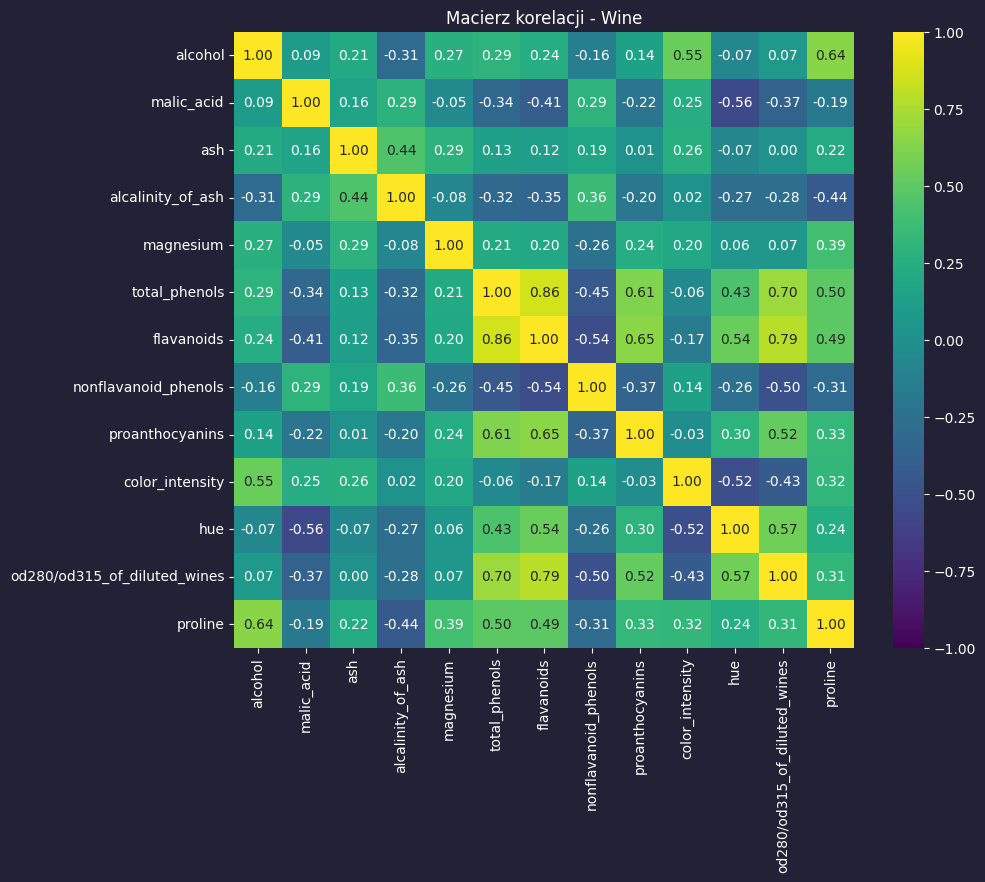

Generowanie histogramów dla Wine (pierwsze 4 cechy)...


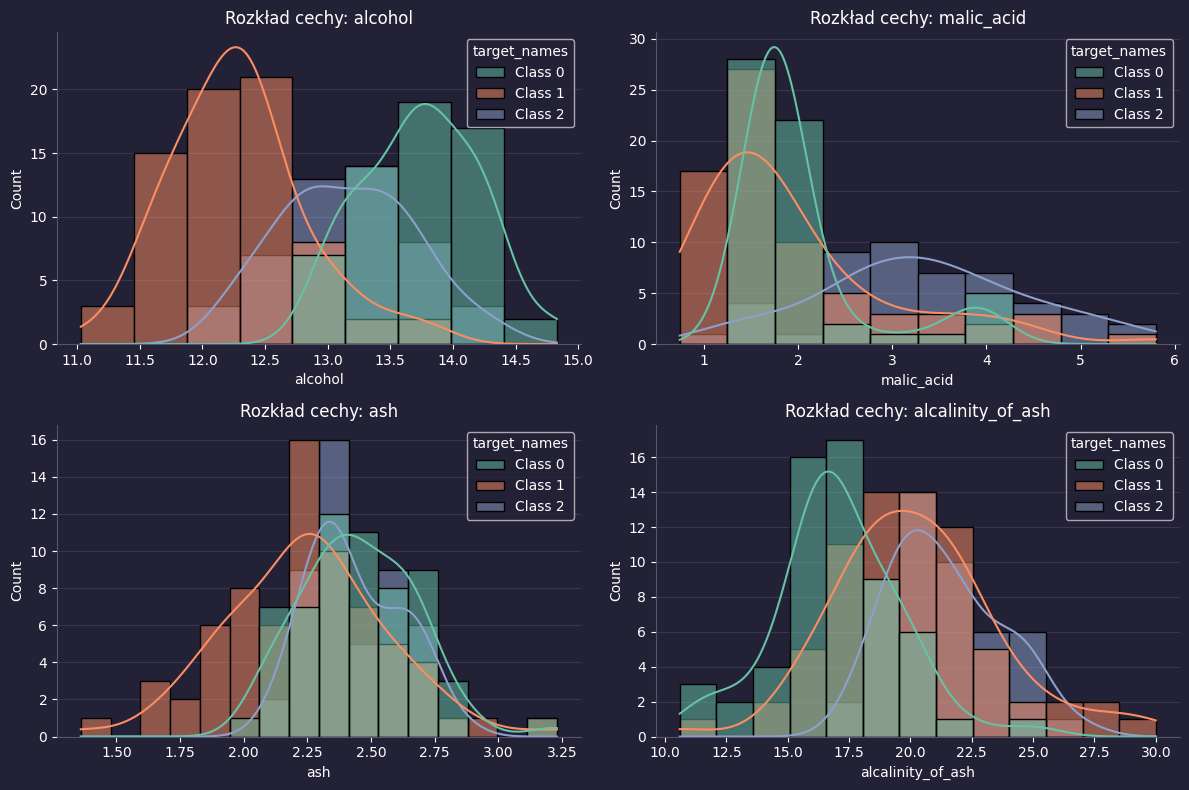

Generowanie wykresów pudełkowych dla Wine (pierwsze 4 cechy)...


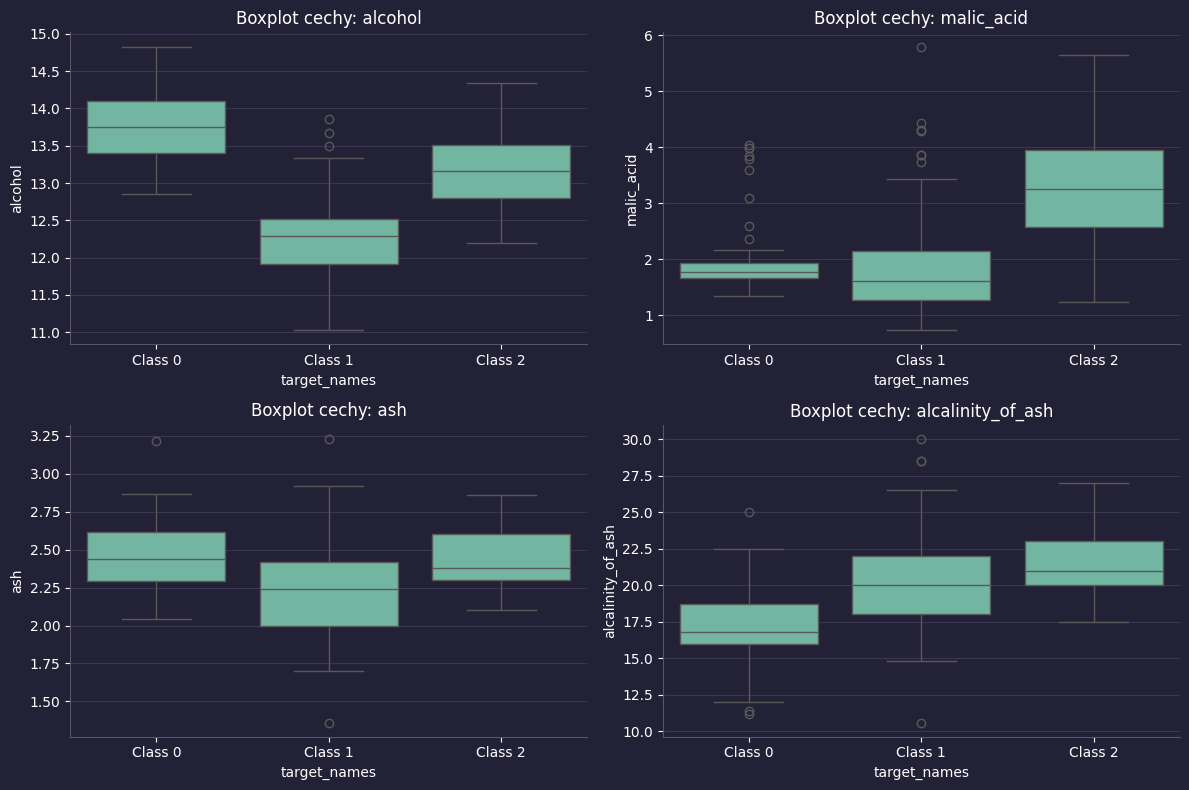


Analiza zakończona. Wykresy zapisano jako pliki PNG i wyświetlone w notatniku.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris, load_wine

# Wczytanie danych Iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target_names'] = iris_df['target'].map({i: name for i, name in enumerate(iris.target_names)})

# Ustawienia wizualizacji
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['text.color'] = 'black'
plt.style.use('rose-pine-moon.mplstyle')
sns.set_palette("Set2")

# Podstawowe informacje o zbiorze Iris
basic_info_iris = {
    'Liczba próbek': [iris_df.shape[0]],
    'Liczba cech': [iris_df.shape[1] - 2],
    'Klasy': [', '.join(iris.target_names)]
}
basic_info_iris_df = pd.DataFrame(basic_info_iris)
styled_basic_info_iris = basic_info_iris_df.style.set_caption('Podstawowe informacje o zbiorze Iris')\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('color', '#4B0082')]},
        {'selector': 'th', 'props': [('background-color', '#E6E6FA'), ('color', 'black'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('background-color', '#F0F8FF'), ('color', 'black')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#F5F5F5')]}
    ])\
    .set_properties(**{'border': '1px solid black', 'text-align': 'center'})
display(styled_basic_info_iris)

# Pozostała część kodu (head, stats, pairplot, itd.) pozostaje taka sama
head_iris_df = iris_df.head()
styled_head_iris = head_iris_df.style.set_caption('Pierwsze kilka wierszy danych')\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('color', '#4B0082')]},
        {'selector': 'th', 'props': [('background-color', '#E6E6FA'), ('color', 'black'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('background-color', '#F0F8FF'), ('color', 'black')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#F5F5F5')]}
    ])\
    .set_properties(**{'border': '1px solid black', 'text-align': 'center'})
display(styled_head_iris)

stats_iris_df = iris_df.drop(columns=['target', 'target_names']).describe()
styled_stats_iris = stats_iris_df.style.set_caption('Statystyki opisowe')\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('color', '#4B0082')]},
        {'selector': 'th', 'props': [('background-color', '#E6E6FA'), ('color', 'black'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('background-color', '#F0F8FF'), ('color', 'black')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#F5F5F5')]}
    ])\
    .set_properties(**{'border': '1px solid black', 'text-align': 'center'})\
    .format("{:.2f}")
display(styled_stats_iris)

# Pairplot
print("\nGenerowanie pairplot dla Iris...")
sns.pairplot(iris_df, vars=iris.feature_names, hue='target_names', diag_kind='hist')
plt.savefig('iris_pairplot.png')
plt.show()
plt.close()

# Macierz korelacji
print("Generowanie macierzy korelacji dla Iris...")
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.drop(columns=['target', 'target_names']).corr(), annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Macierz korelacji - Iris', color='white')
plt.savefig('iris_correlation.png')
plt.show()
plt.close()

# Histogramy
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'
print("Generowanie histogramów dla Iris...")
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, feature in enumerate(iris.feature_names):
    sns.histplot(data=iris_df, x=feature, hue='target_names', kde=True, ax=axes[i])
    axes[i].set_title(f'Rozkład cechy: {feature}', color='white')
    axes[i].tick_params(colors='white')
plt.tight_layout()
plt.savefig('iris_histograms.png')
plt.show()
plt.close()

# Wykresy pudełkowe
print("Generowanie wykresów pudełkowych dla Iris...")
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, feature in enumerate(iris.feature_names):
    sns.boxplot(data=iris_df, x='target_names', y=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot cechy: {feature}', color='white')
    axes[i].tick_params(colors='white')
plt.tight_layout()
plt.savefig('iris_boxplots.png')
plt.show()
plt.close()

# --- Zbiór danych Wine ---
print("\n=== Analiza zbioru danych Wine ===")
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df['target_names'] = wine_df['target'].map({i: f'Class {i}' for i in range(len(wine.target_names))})

basic_info = {
    'Liczba próbek': [wine_df.shape[0]],
    'Liczba cech': [wine_df.shape[1] - 2],
    'Klasy': [', '.join(wine.target_names)]
}
basic_info_df = pd.DataFrame(basic_info)
styled_basic_info = basic_info_df.style.set_caption('Podstawowe informacje o zbiorze Wine')\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('color', '#4B0082')]},
        {'selector': 'th', 'props': [('background-color', '#E6E6FA'), ('color', 'black'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('background-color', '#F0F8FF'), ('color', 'black')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#F5F5F5')]}
    ])\
    .set_properties(**{'border': '1px solid black', 'text-align': 'center'})
display(styled_basic_info)

head_df = wine_df.head()
styled_head = head_df.style.set_caption('Pierwsze kilka wierszy danych')\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('color', '#4B0082')]},
        {'selector': 'th', 'props': [('background-color', '#E6E6FA'), ('color', 'black'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('background-color', '#F0F8FF'), ('color', 'black')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#F5F5F5')]}
    ])\
    .set_properties(**{'border': '1px solid black', 'text-align': 'center'})
display(styled_head)

stats_df = wine_df.drop(columns=['target', 'target_names']).describe()
styled_stats = stats_df.style.set_caption('Statystyki opisowe')\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('color', '#4B0082')]},
        {'selector': 'th', 'props': [('background-color', '#E6E6FA'), ('color', 'black'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('background-color', '#F0F8FF'), ('color', 'black')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#F5F5F5')]}
    ])\
    .set_properties(**{'border': '1px solid black', 'text-align': 'center'})\
    .format("{:.2f}")
display(styled_stats)

print("\nGenerowanie pairplot dla Wine (pierwsze 4 cechy)...")
selected_features = wine.feature_names[:4]
sns.pairplot(wine_df, vars=selected_features, hue='target_names', diag_kind='hist')
plt.savefig('wine_pairplot.png')
plt.show()
plt.close()

print("Generowanie macierzy korelacji dla Wine...")
plt.figure(figsize=(10, 8))
sns.heatmap(wine_df.drop(columns=['target', 'target_names']).corr(), annot=True, cmap='viridis', vmin=-1, vmax=1, fmt='.2f')
plt.title('Macierz korelacji - Wine', color='white')
plt.savefig('wine_correlation.png')
plt.show()
plt.close()

print("Generowanie histogramów dla Wine (pierwsze 4 cechy)...")
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, feature in enumerate(selected_features):
    sns.histplot(data=wine_df, x=feature, hue='target_names', kde=True, ax=axes[i])
    axes[i].set_title(f'Rozkład cechy: {feature}', color='white')
    axes[i].tick_params(colors='white')
plt.tight_layout()
plt.savefig('wine_histograms.png')
plt.show()
plt.close()

print("Generowanie wykresów pudełkowych dla Wine (pierwsze 4 cechy)...")
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, feature in enumerate(selected_features):
    sns.boxplot(data=wine_df, x='target_names', y=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot cechy: {feature}', color='white')
    axes[i].tick_params(colors='white')
plt.tight_layout()
plt.savefig('wine_boxplots.png')
plt.show()
plt.close()

print("\nAnaliza zakończona. Wykresy zapisano jako pliki PNG i wyświetlone w notatniku.")


=== Analiza klasyfikacji dla zbioru Iris ===

Klasyfikator: KNN (n_neighbors=3)
Dokładność: 1.000 (100.0%)


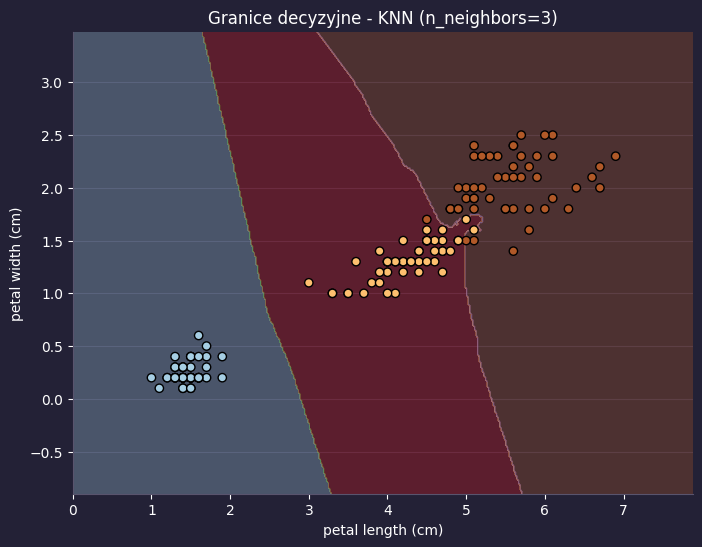

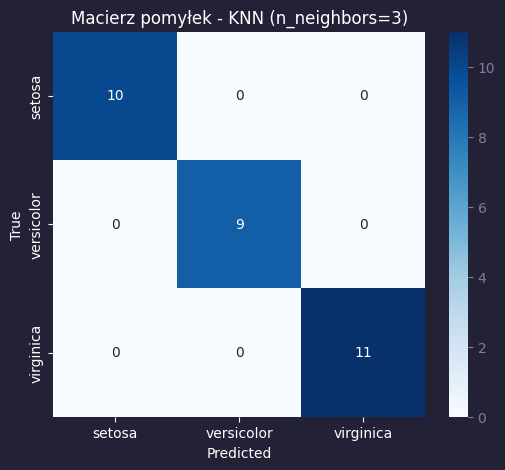


Klasyfikator: KNN (n_neighbors=5)
Dokładność: 1.000 (100.0%)


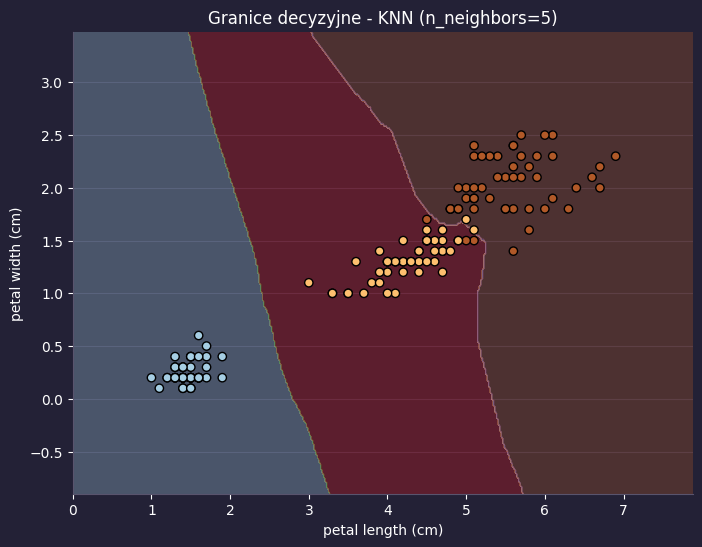

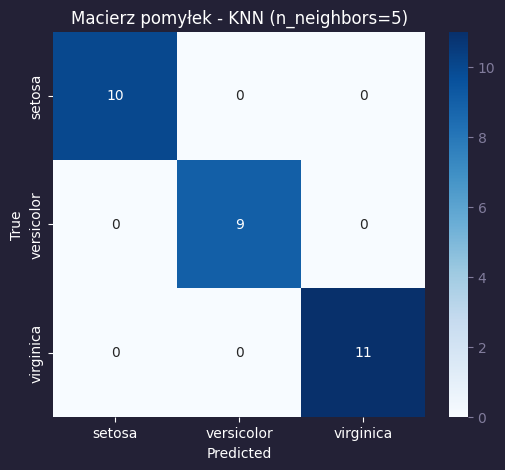


Klasyfikator: KNN (n_neighbors=7)
Dokładność: 1.000 (100.0%)


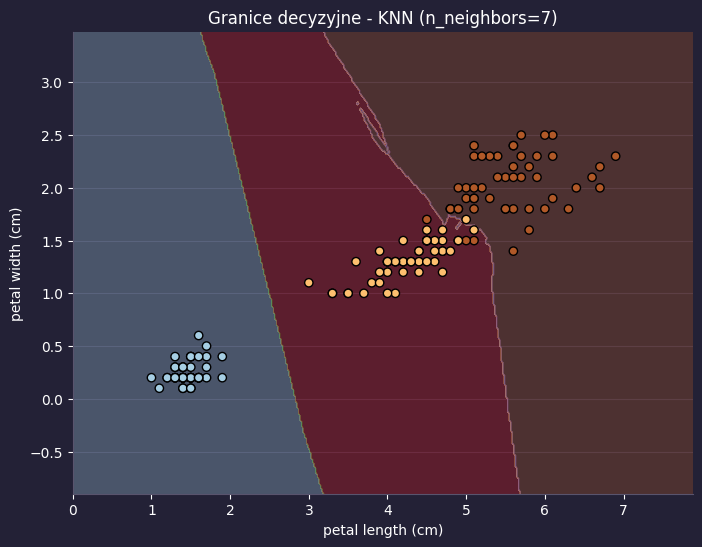

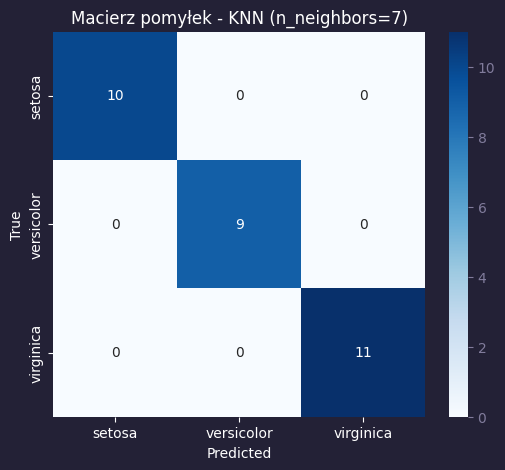


Klasyfikator: SVM (kernel=linear)
Dokładność: 1.000 (100.0%)


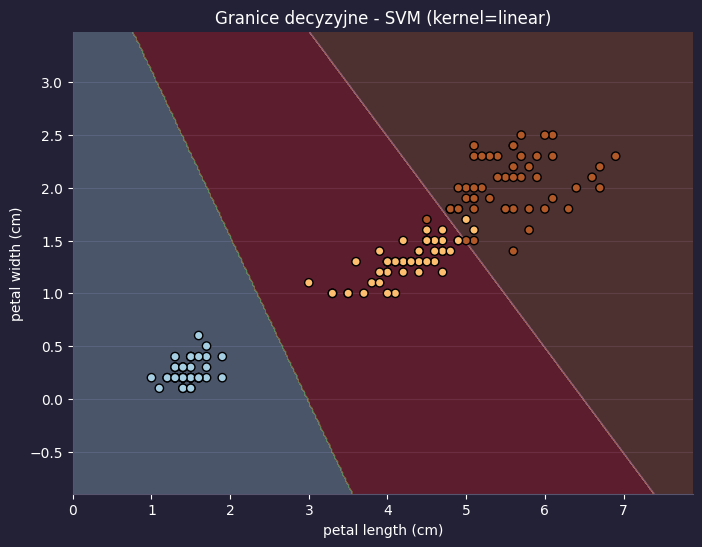

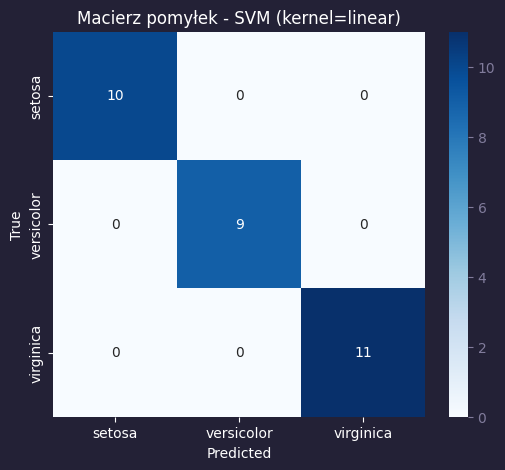


Klasyfikator: SVM (kernel=rbf)
Dokładność: 1.000 (100.0%)


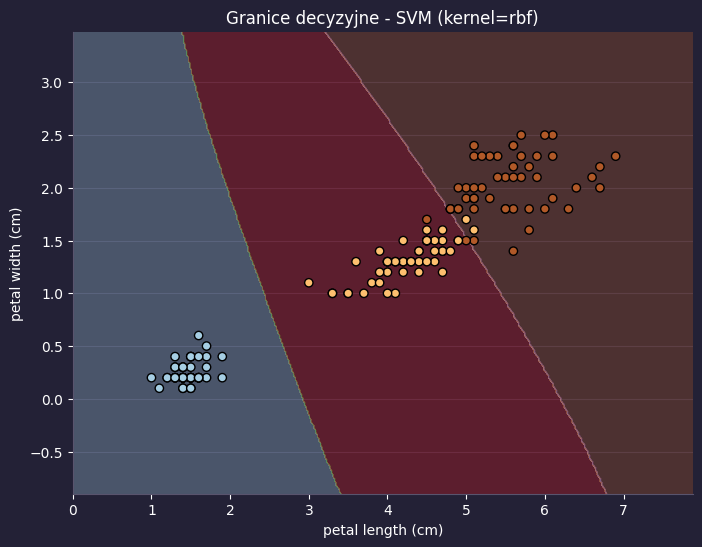

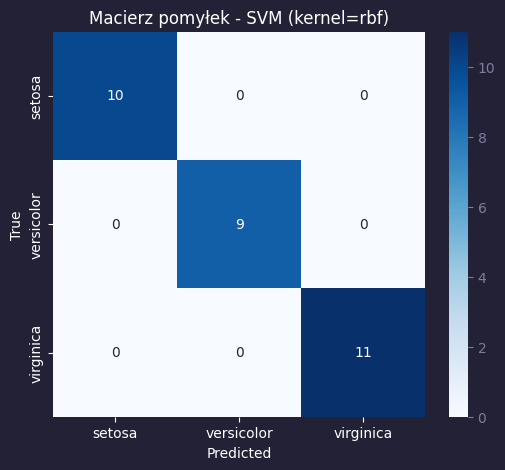


=== Analiza klasyfikacji dla zbioru Wine ===

Klasyfikator: KNN (n_neighbors=3)
Dokładność: 0.861 (86.1%)


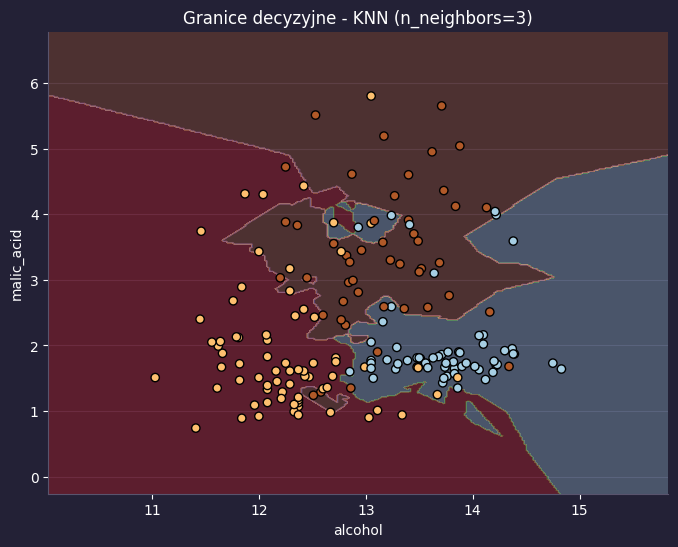

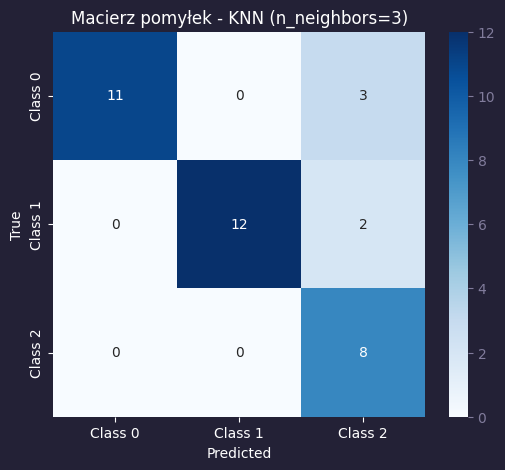


Klasyfikator: KNN (n_neighbors=5)
Dokładność: 0.833 (83.3%)


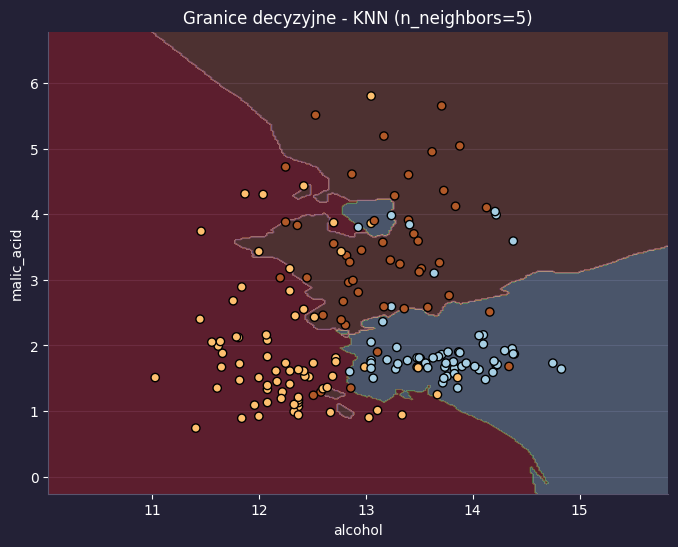

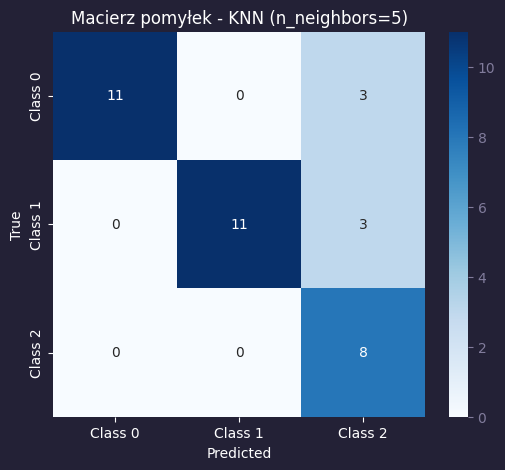


Klasyfikator: KNN (n_neighbors=7)
Dokładność: 0.833 (83.3%)


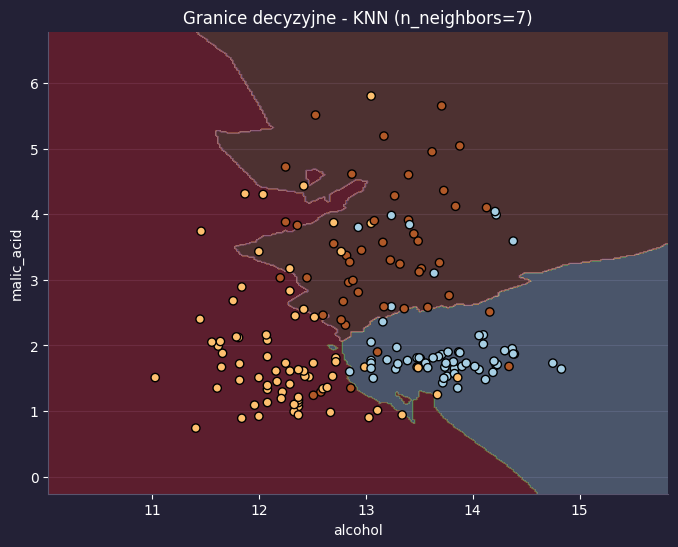

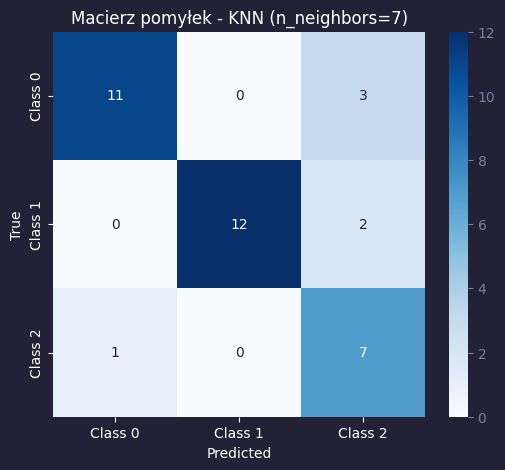


Klasyfikator: SVM (kernel=linear)
Dokładność: 0.778 (77.8%)


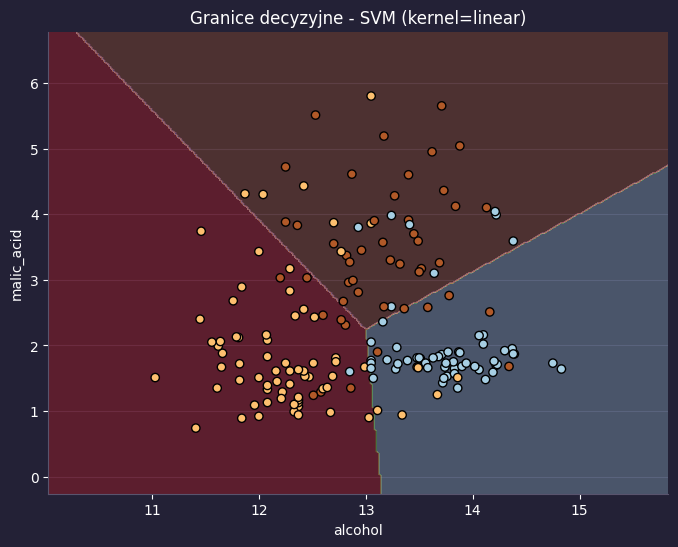

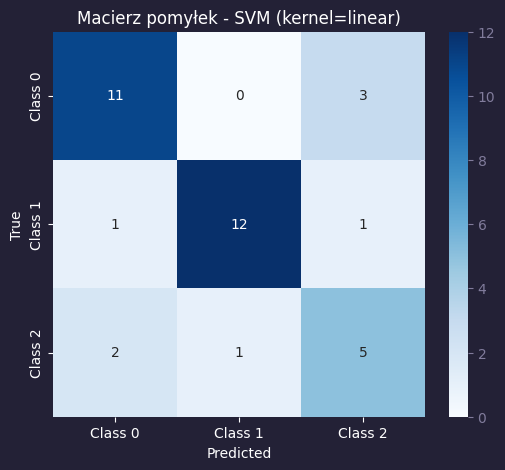


Klasyfikator: SVM (kernel=rbf)
Dokładność: 0.806 (80.6%)


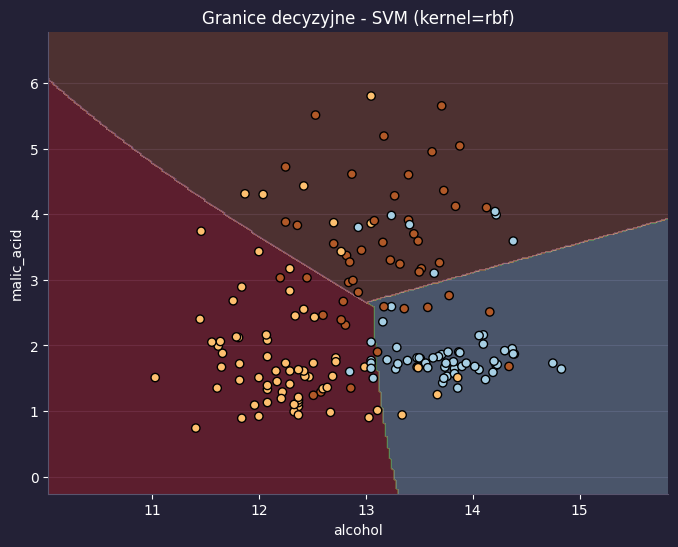

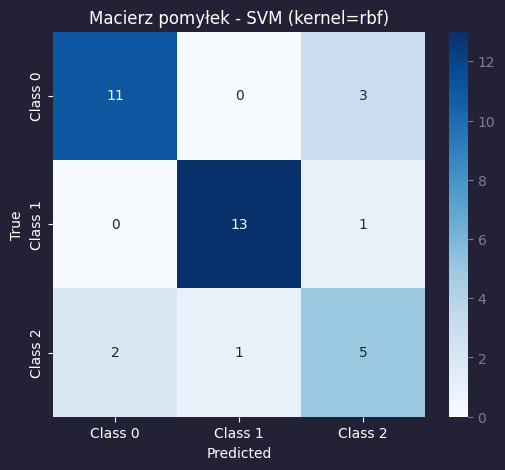


=== Tabela wyników ===
Dataset    Classifier            Accuracy
--------------------------------------------------
Iris       KNN (n_neighbors=3)   1.000 (100.0%)
Iris       KNN (n_neighbors=5)   1.000 (100.0%)
Iris       KNN (n_neighbors=7)   1.000 (100.0%)
Iris       SVM (kernel=linear)   1.000 (100.0%)
Iris       SVM (kernel=rbf)      1.000 (100.0%)
Wine       KNN (n_neighbors=3)    0.861 (86.1%)
Wine       KNN (n_neighbors=5)    0.833 (83.3%)
Wine       KNN (n_neighbors=7)    0.833 (83.3%)
Wine       SVM (kernel=linear)    0.778 (77.8%)
Wine       SVM (kernel=rbf)       0.806 (80.6%)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('rose-pine-moon.mplstyle')

def plot_decision_boundary(X, y, model, feature_names, title, dataset_name):
    h = 0.02  # Krok siatki
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel(feature_names[0], color='white')
    plt.ylabel(feature_names[1], color='white')
    plt.title(title, color='white')
    plt.tick_params(colors='white')
    plt.savefig(f'{dataset_name}_{title.replace(" ", "_")}_boundary.png')
    plt.show()
    plt.close()

def plot_confusion_matrix(y_true, y_pred, title, dataset_name, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(title, color='white')
    plt.xlabel('Predicted', color='white')
    plt.ylabel('True', color='white')
    plt.tick_params(colors='white')
    plt.savefig(f'{dataset_name}_{title.replace(" ", "_")}_confusion.png')
    plt.show()
    plt.close()

def analyze_classification(X, y, dataset_name, selected_features, feature_names, class_names, results):
    # Podział na zbiory treningowe i testowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Wybór 2D cech dla treningu i testu
    X_2d_train = X_train[:, selected_features]
    X_2d_test = X_test[:, selected_features]

    classifiers = [
        ('KNN (n_neighbors=3)', KNeighborsClassifier(n_neighbors=3)),
        ('KNN (n_neighbors=5)', KNeighborsClassifier(n_neighbors=5)),
        ('KNN (n_neighbors=7)', KNeighborsClassifier(n_neighbors=7)),
        ('SVM (kernel=linear)', SVC(kernel='linear', random_state=42)),
        ('SVM (kernel=rbf)', SVC(kernel='rbf', random_state=42)),
    ]

    print(f"\n=== Analiza klasyfikacji dla zbioru {dataset_name} ===")
    
    for name, clf in classifiers:
        print(f"\nKlasyfikator: {name}")
        # Trenowanie na 2D danych treningowych
        clf.fit(X_2d_train, y_train)
        # Predykcja na 2D danych testowych
        y_pred = clf.predict(X_2d_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Dokładność: {accuracy:.3f} ({accuracy*100:.1f}%)")
        # Dodanie wyniku do listy wyników
        results.append([dataset_name, name, f"{accuracy:.3f} ({accuracy*100:.1f}%)"])
        # Rysowanie granic decyzyjnych na pełnym zbiorze 2D
        X_2d = np.vstack((X_2d_train, X_2d_test))
        y_full = np.concatenate((y_train, y_test))
        plot_decision_boundary(X_2d, y_full, clf, feature_names, f"Granice decyzyjne - {name}", dataset_name)
        plot_confusion_matrix(y_test, y_pred, f"Macierz pomyłek - {name}", dataset_name, class_names)

# Lista do przechowywania wyników
results = []

# Załóżmy, że iris_df i wine_df są zdefiniowane wcześniej
X_iris = iris_df.drop(columns=['target', 'target_names']).values
y_iris = iris_df['target'].values
iris_selected_features = [2, 3]  # petal length, petal width
iris_feature_names = ['petal length (cm)', 'petal width (cm)']
iris_class_names = iris_df['target_names'].unique()

X_wine = wine_df.drop(columns=['target', 'target_names']).values
y_wine = wine_df['target'].values
wine_selected_features = [0, 1]  # alcohol, malic_acid
wine_feature_names = ['alcohol', 'malic_acid']
wine_class_names = wine_df['target_names'].unique()

# Analiza dla obu zbiorów danych
analyze_classification(X_iris, y_iris, 'Iris', iris_selected_features, iris_feature_names, iris_class_names, results)
analyze_classification(X_wine, y_wine, 'Wine', wine_selected_features, wine_feature_names, wine_class_names, results)

# Wyświetlenie tabeli wyników bez tabulate
print("\n=== Tabela wyników ===")
print("Dataset    Classifier            Accuracy")
print("-" * 50)
for row in results:
    print(f"{row[0]:<10} {row[1]:<20} {row[2]:>15}")

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

def run_classification(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Skalowanie danych
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    results = []
    
    # KNN z GridSearchCV
    param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        'Dataset': dataset_name,
        'Classifier': f'KNN (best_params={grid_search.best_params_})',
        'Accuracy': accuracy
    })
    
    # SVM z dodatkowymi parametrami
    for kernel in ['linear', 'rbf']:
        svm = SVC(kernel=kernel, C=1.0, random_state=42)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append({
            'Dataset': dataset_name,
            'Classifier': f'SVM (kernel={kernel}, C=1.0)',
            'Accuracy': accuracy
        })
    
    # GaussianNB
    nb = GaussianNB(var_smoothing=1e-8)
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        'Dataset': dataset_name,
        'Classifier': 'GaussianNB (var_smoothing=1e-8)',
        'Accuracy': accuracy
    })
    
    return results

X_iris = iris_df.drop(columns=['target', 'target_names']).values
y_iris = iris_df['target'].values
X_wine = wine_df.drop(columns=['target', 'target_names']).values
y_wine = wine_df['target'].values

results_iris = run_classification(X_iris, y_iris, 'Iris')
results_wine = run_classification(X_wine, y_wine, 'Wine')

all_results = results_iris + results_wine
results_df = pd.DataFrame(all_results)

results_df['Accuracy'] = results_df['Accuracy'].map(lambda x: f"{x:.3f} ({x*100:.1f}%)")

styled_results = results_df.style.set_caption('Wyniki klasyfikacji')\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('color', '#4B0082')]},
        {'selector': 'th', 'props': [('background-color', '#E6E6FA'), ('color', 'black'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('background-color', '#F0F8FF'), ('color', 'black')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#F5F5F5')]}
    ])\
    .set_properties(**{'border': '1px solid black', 'text-align': 'center'})
display(styled_results)


=== Analiza klasyfikacji dla zbioru Iris ===

Klasyfikator: KNN (n_neighbors=3)
Dokładność: 1.000 (100.0%)


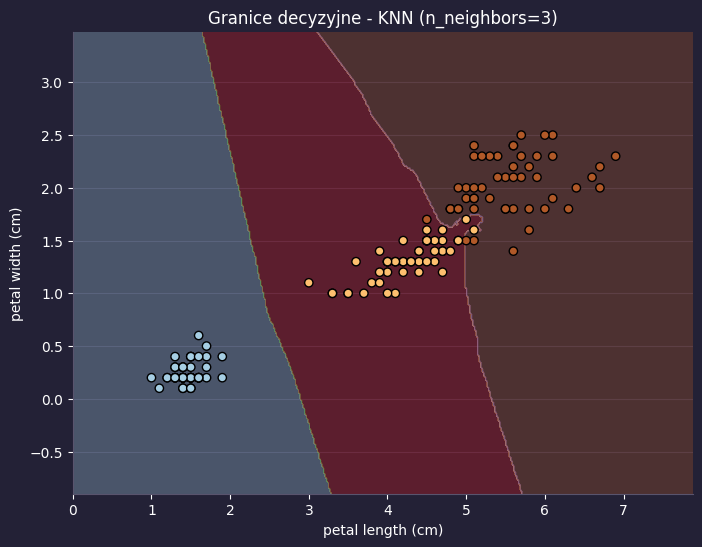

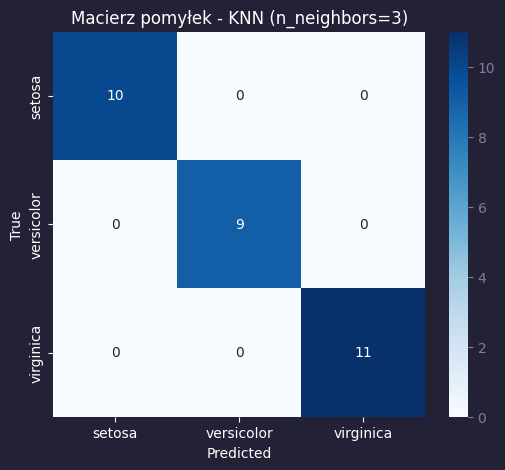


Klasyfikator: KNN (n_neighbors=5)
Dokładność: 1.000 (100.0%)


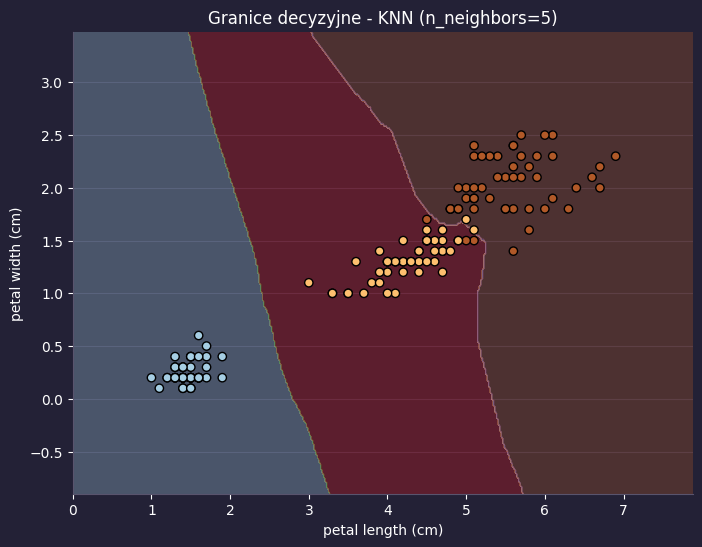

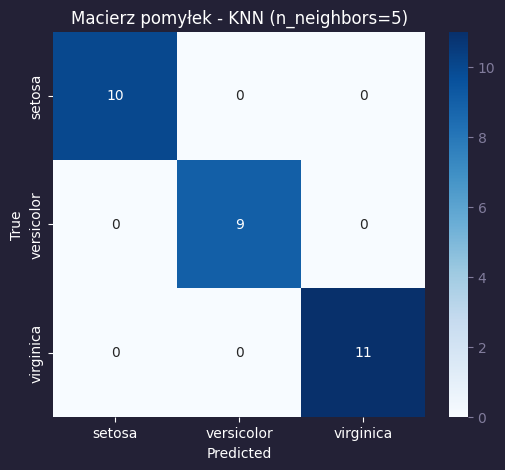


Klasyfikator: KNN (n_neighbors=7)
Dokładność: 1.000 (100.0%)


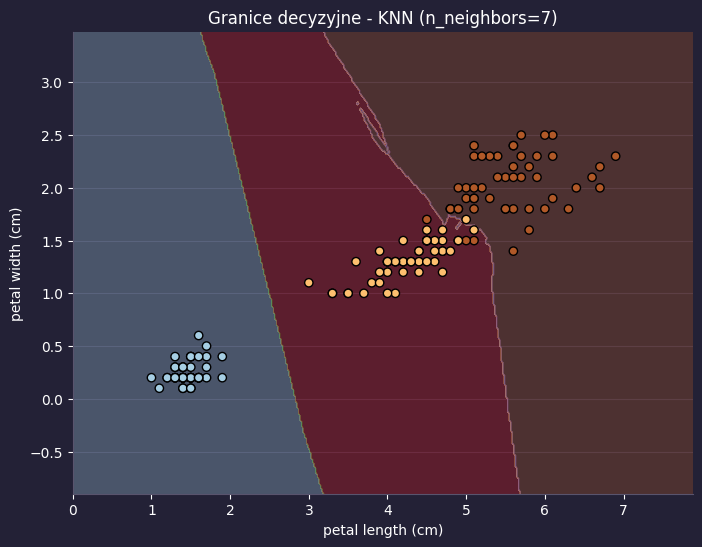

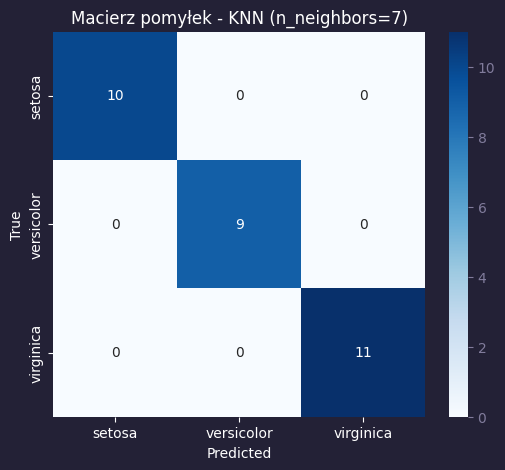


Klasyfikator: SVM (kernel=linear)
Dokładność: 1.000 (100.0%)


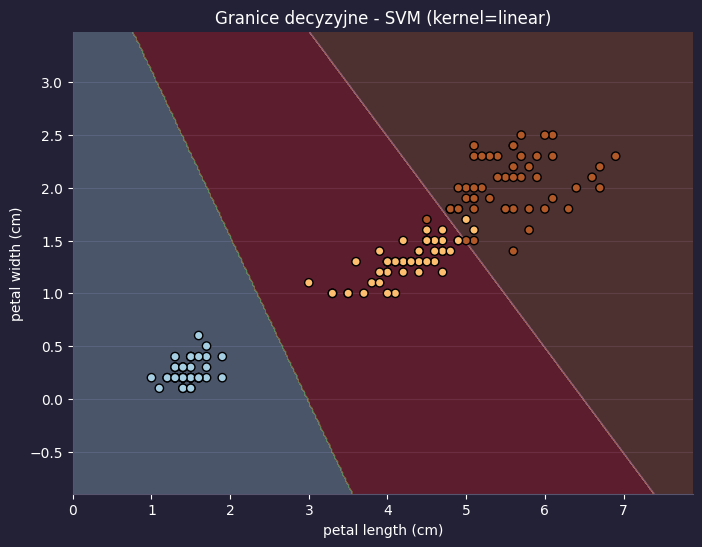

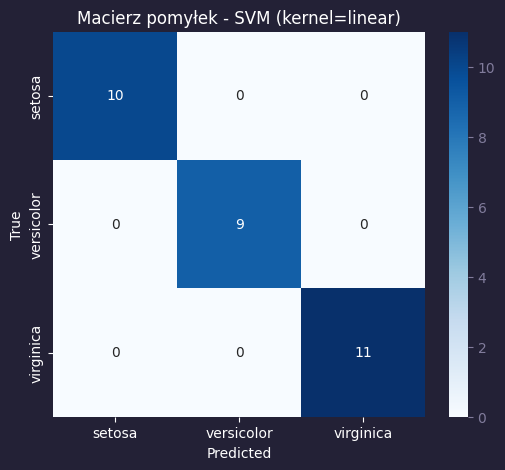


Klasyfikator: SVM (kernel=rbf)
Dokładność: 1.000 (100.0%)


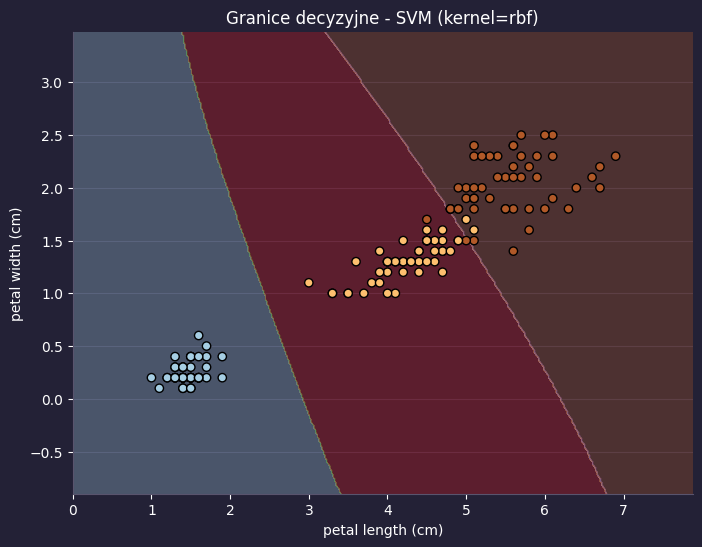

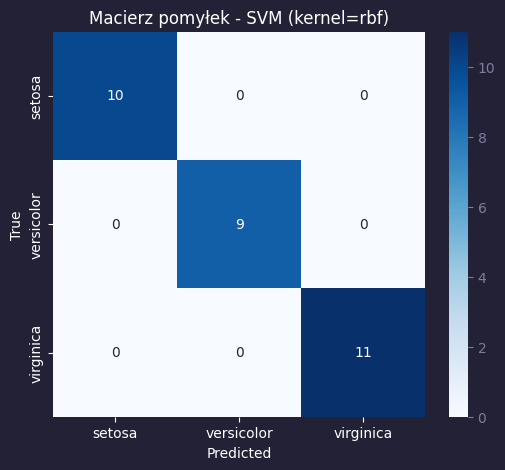


=== Analiza klasyfikacji dla zbioru Wine ===

Klasyfikator: KNN (n_neighbors=3)
Dokładność: 0.861 (86.1%)


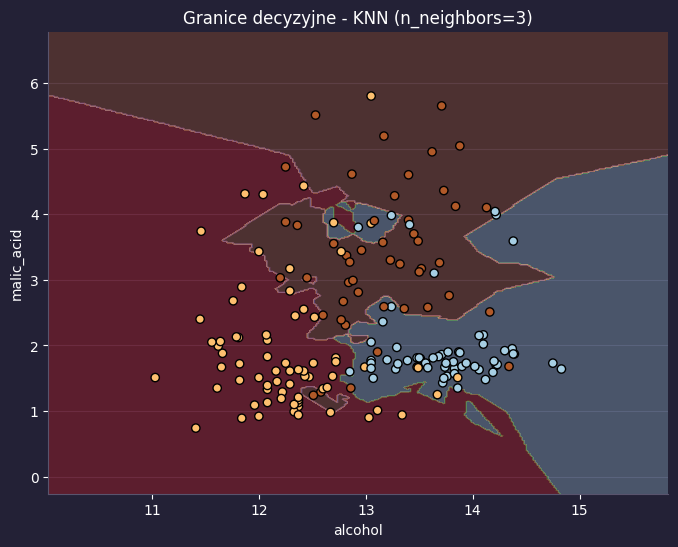

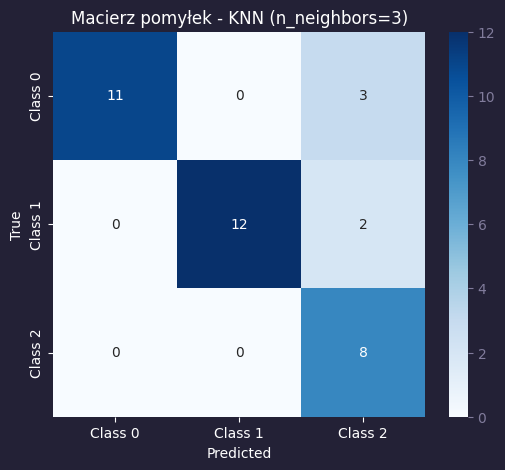


Klasyfikator: KNN (n_neighbors=5)
Dokładność: 0.833 (83.3%)


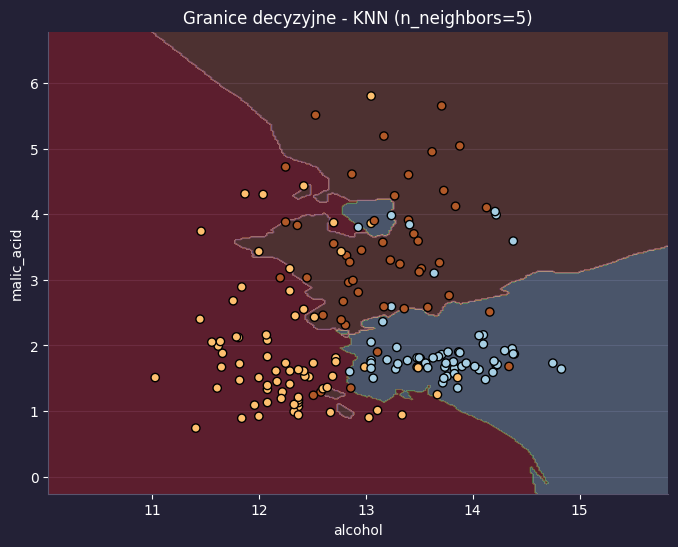

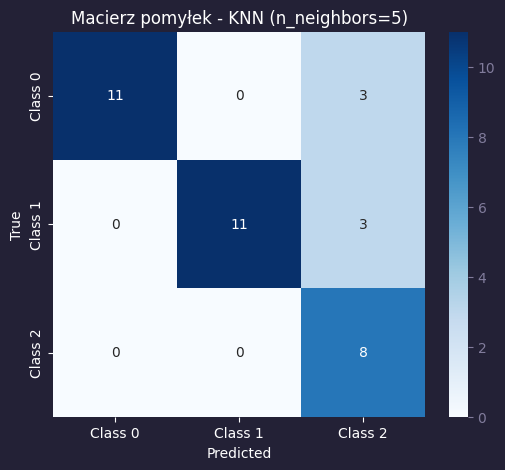


Klasyfikator: KNN (n_neighbors=7)
Dokładność: 0.833 (83.3%)


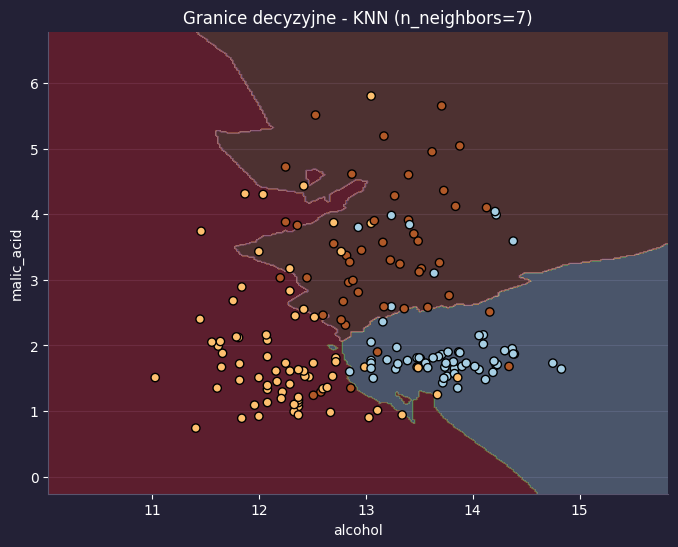

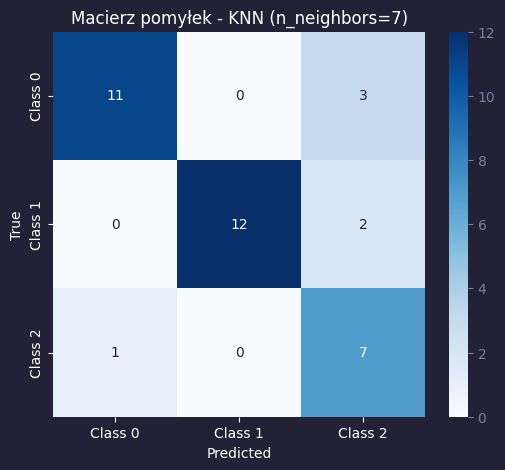


Klasyfikator: SVM (kernel=linear)
Dokładność: 0.778 (77.8%)


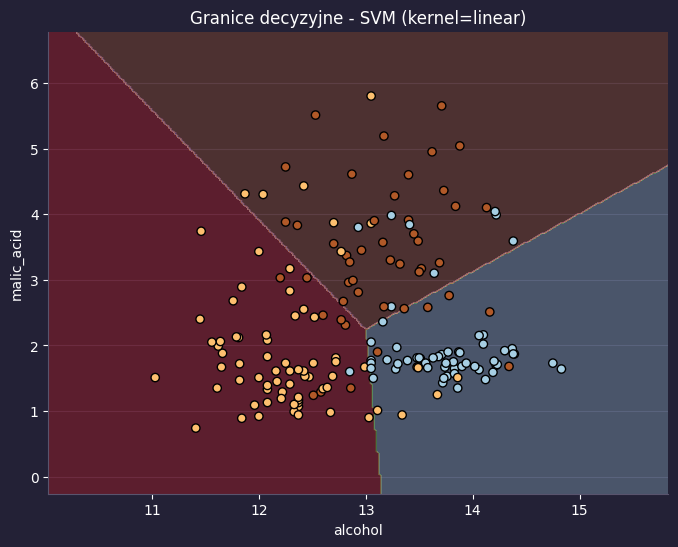

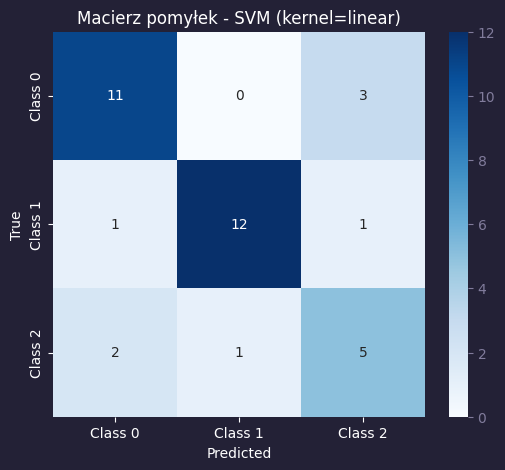


Klasyfikator: SVM (kernel=rbf)
Dokładność: 0.806 (80.6%)


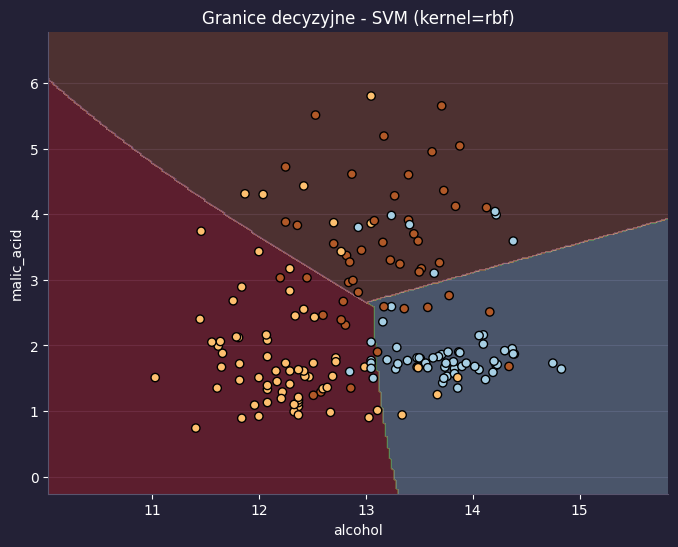

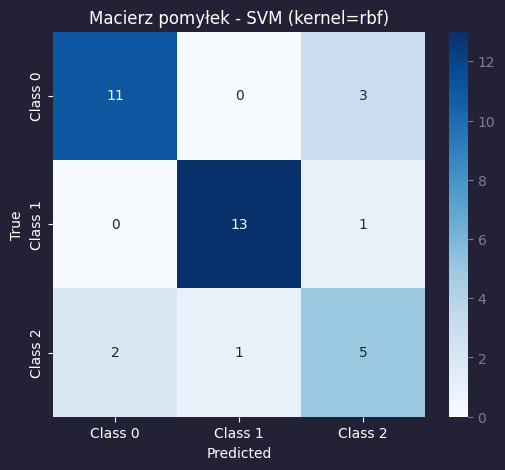


=== Tabela wyników ===
Dataset    Classifier            Accuracy
--------------------------------------------------
Iris       KNN (n_neighbors=3)   1.000 (100.0%)
Iris       KNN (n_neighbors=5)   1.000 (100.0%)
Iris       KNN (n_neighbors=7)   1.000 (100.0%)
Iris       SVM (kernel=linear)   1.000 (100.0%)
Iris       SVM (kernel=rbf)      1.000 (100.0%)
Wine       KNN (n_neighbors=3)    0.861 (86.1%)
Wine       KNN (n_neighbors=5)    0.833 (83.3%)
Wine       KNN (n_neighbors=7)    0.833 (83.3%)
Wine       SVM (kernel=linear)    0.778 (77.8%)
Wine       SVM (kernel=rbf)       0.806 (80.6%)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('rose-pine-moon.mplstyle')

def plot_decision_boundary(X, y, model, feature_names, title, dataset_name):
    h = 0.02  # Krok siatki
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel(feature_names[0], color='white')
    plt.ylabel(feature_names[1], color='white')
    plt.title(title, color='white')
    plt.tick_params(colors='white')
    plt.savefig(f'{dataset_name}_{title.replace(" ", "_")}_boundary.png')
    plt.show()
    plt.close()

def plot_confusion_matrix(y_true, y_pred, title, dataset_name, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(title, color='white')
    plt.xlabel('Predicted', color='white')
    plt.ylabel('True', color='white')
    plt.tick_params(colors='white')
    plt.savefig(f'{dataset_name}_{title.replace(" ", "_")}_confusion.png')
    plt.show()
    plt.close()

def analyze_classification(X, y, dataset_name, selected_features, feature_names, class_names, results):
    # Podział na zbiory treningowe i testowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Wybór 2D cech dla treningu i testu
    X_2d_train = X_train[:, selected_features]
    X_2d_test = X_test[:, selected_features]

    classifiers = [
        ('KNN (n_neighbors=3)', KNeighborsClassifier(n_neighbors=3)),
        ('KNN (n_neighbors=5)', KNeighborsClassifier(n_neighbors=5)),
        ('KNN (n_neighbors=7)', KNeighborsClassifier(n_neighbors=7)),
        ('SVM (kernel=linear)', SVC(kernel='linear', random_state=42)),
        ('SVM (kernel=rbf)', SVC(kernel='rbf', random_state=42)),
    ]

    print(f"\n=== Analiza klasyfikacji dla zbioru {dataset_name} ===")
    
    for name, clf in classifiers:
        print(f"\nKlasyfikator: {name}")
        # Trenowanie na 2D danych treningowych
        clf.fit(X_2d_train, y_train)
        # Predykcja na 2D danych testowych
        y_pred = clf.predict(X_2d_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Dokładność: {accuracy:.3f} ({accuracy*100:.1f}%)")
        # Dodanie wyniku do listy wyników
        results.append([dataset_name, name, f"{accuracy:.3f} ({accuracy*100:.1f}%)"])
        # Rysowanie granic decyzyjnych na pełnym zbiorze 2D
        X_2d = np.vstack((X_2d_train, X_2d_test))
        y_full = np.concatenate((y_train, y_test))
        plot_decision_boundary(X_2d, y_full, clf, feature_names, f"Granice decyzyjne - {name}", dataset_name)
        plot_confusion_matrix(y_test, y_pred, f"Macierz pomyłek - {name}", dataset_name, class_names)

# Lista do przechowywania wyników
results = []

# Załóżmy, że iris_df i wine_df są zdefiniowane wcześniej
X_iris = iris_df.drop(columns=['target', 'target_names']).values
y_iris = iris_df['target'].values
iris_selected_features = [2, 3]  # petal length, petal width
iris_feature_names = ['petal length (cm)', 'petal width (cm)']
iris_class_names = iris_df['target_names'].unique()

X_wine = wine_df.drop(columns=['target', 'target_names']).values
y_wine = wine_df['target'].values
wine_selected_features = [0, 1]  # alcohol, malic_acid
wine_feature_names = ['alcohol', 'malic_acid']
wine_class_names = wine_df['target_names'].unique()

# Analiza dla obu zbiorów danych
analyze_classification(X_iris, y_iris, 'Iris', iris_selected_features, iris_feature_names, iris_class_names, results)
analyze_classification(X_wine, y_wine, 'Wine', wine_selected_features, wine_feature_names, wine_class_names, results)

# Wyświetlenie tabeli wyników bez tabulate
print("\n=== Tabela wyników ===")
print("Dataset    Classifier            Accuracy")
print("-" * 50)
for row in results:
    print(f"{row[0]:<10} {row[1]:<20} {row[2]:>15}")


=== Analiza klasyfikacji dla zbioru Iris ===

Klasyfikator: KNN (n_neighbors=3)
Dokładność: 0.967 (96.7%)


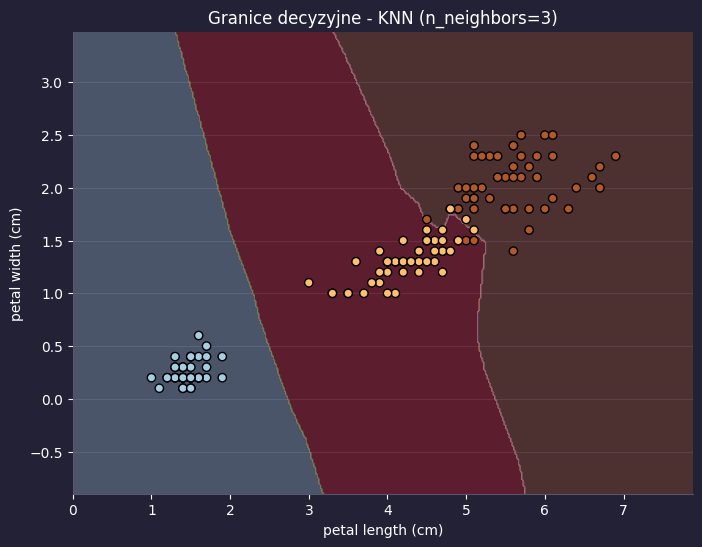

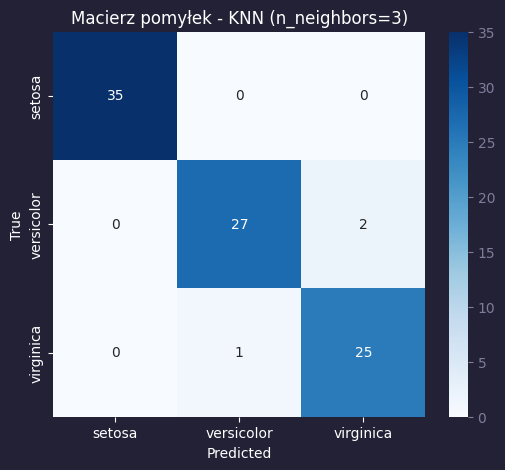


Klasyfikator: KNN (n_neighbors=5)
Dokładność: 0.978 (97.8%)


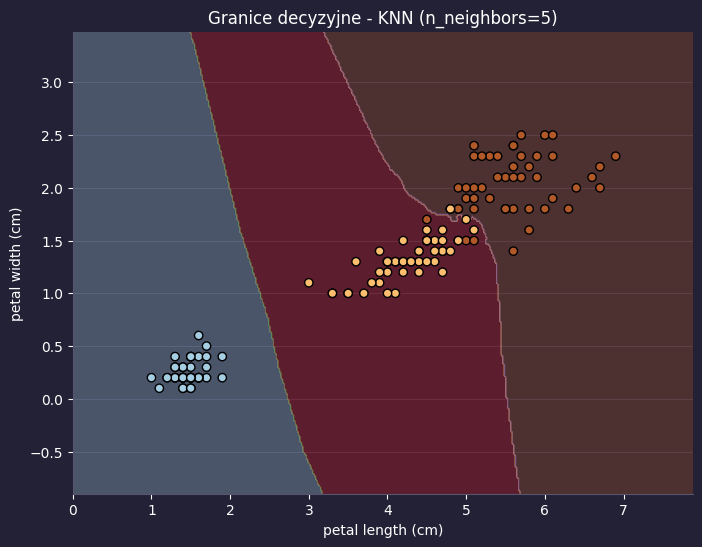

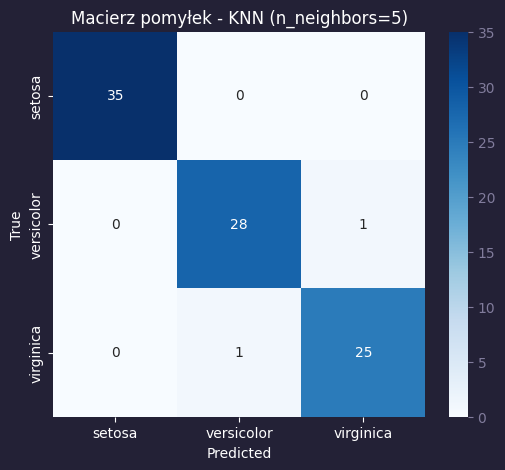


Klasyfikator: KNN (n_neighbors=7)
Dokładność: 0.967 (96.7%)


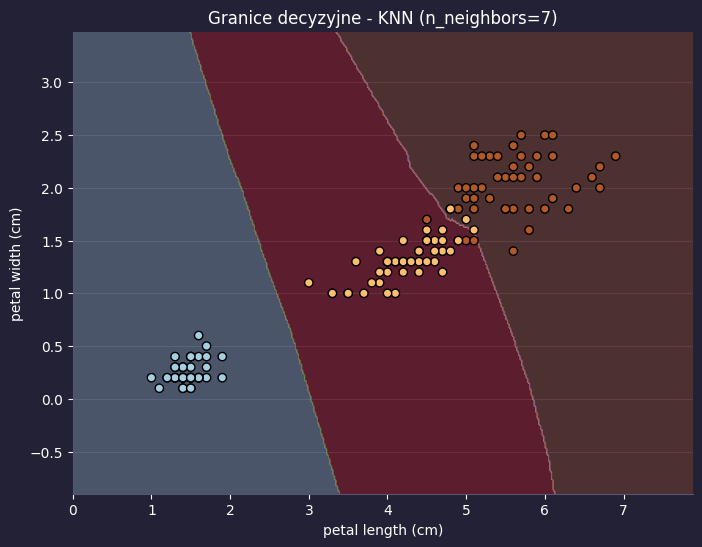

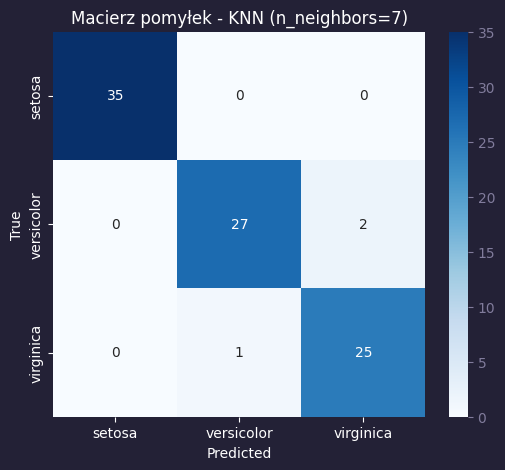


Klasyfikator: SVM (kernel=linear)
Dokładność: 0.967 (96.7%)


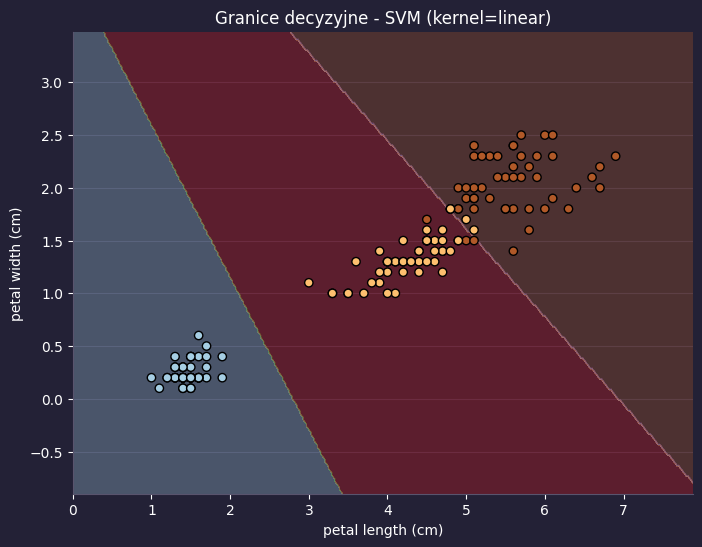

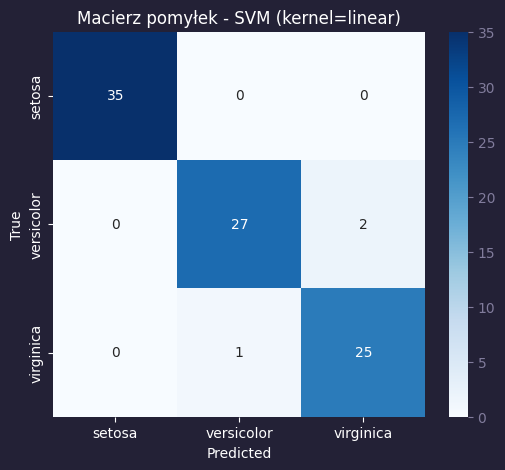


Klasyfikator: SVM (kernel=rbf)
Dokładność: 0.978 (97.8%)


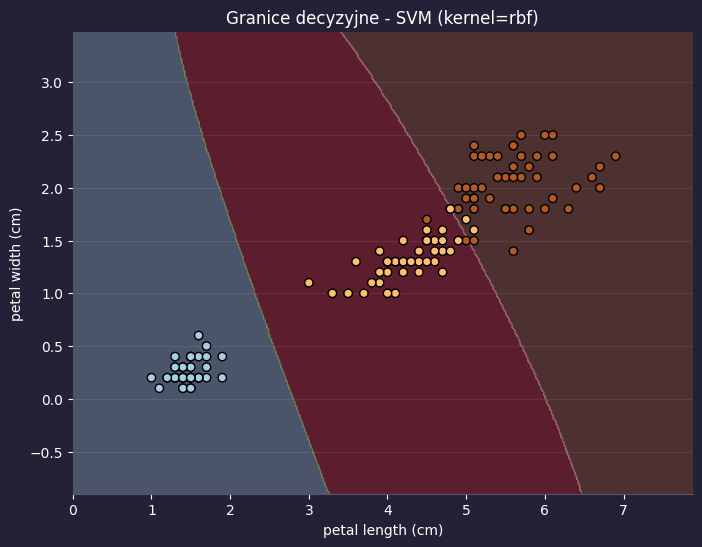

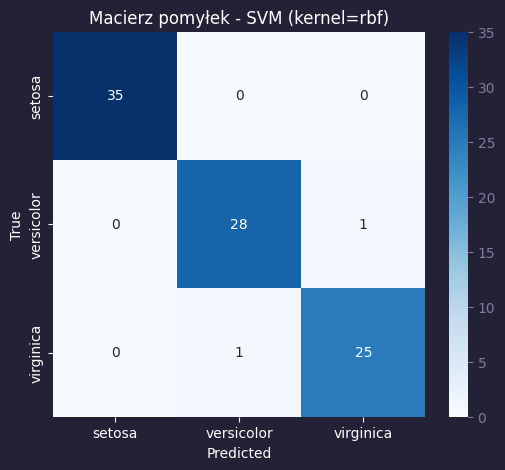


=== Analiza klasyfikacji dla zbioru Wine ===

Klasyfikator: KNN (n_neighbors=3)
Dokładność: 0.757 (75.7%)


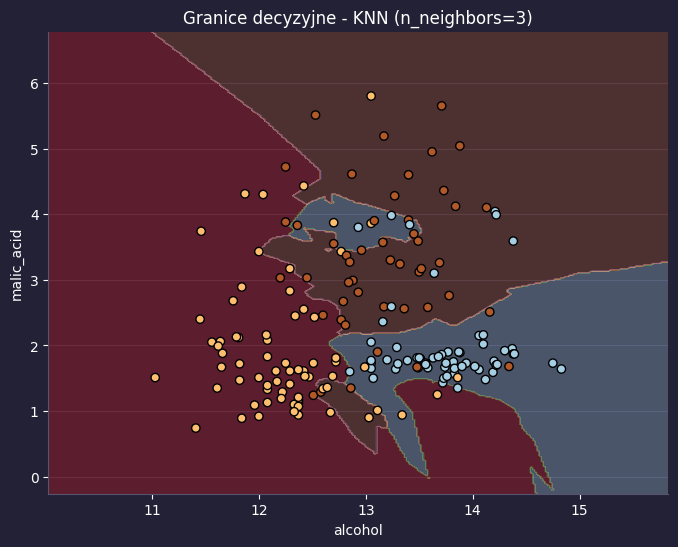

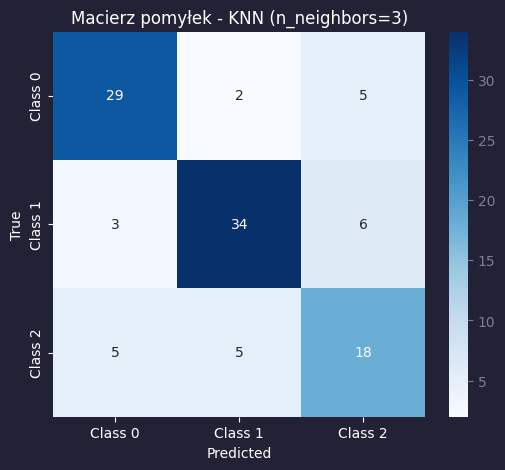


Klasyfikator: KNN (n_neighbors=5)
Dokładność: 0.832 (83.2%)


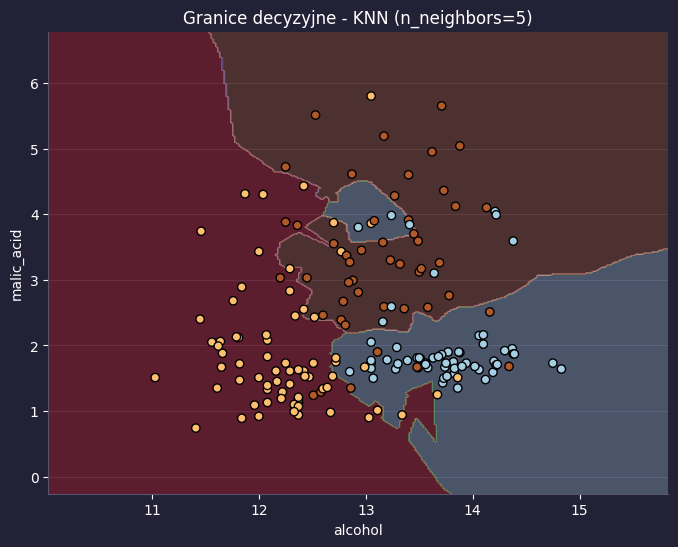

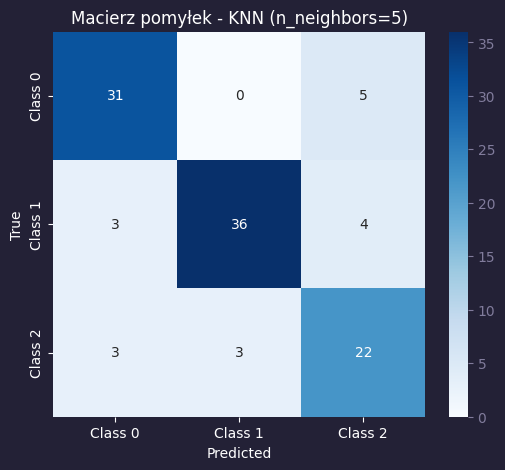


Klasyfikator: KNN (n_neighbors=7)
Dokładność: 0.822 (82.2%)


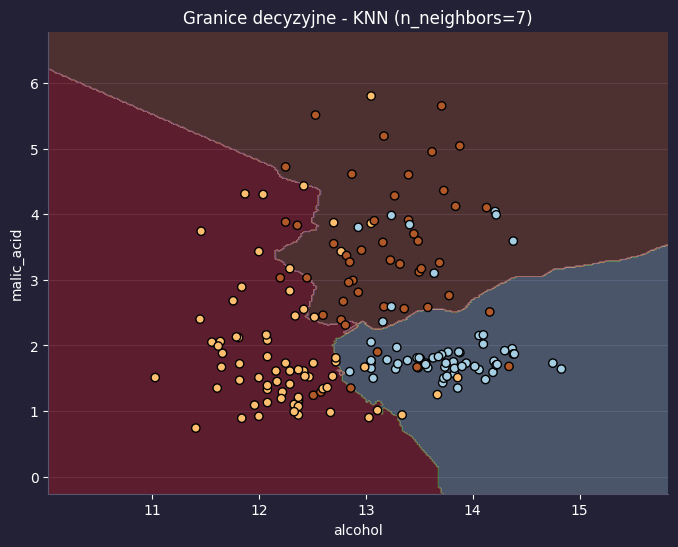

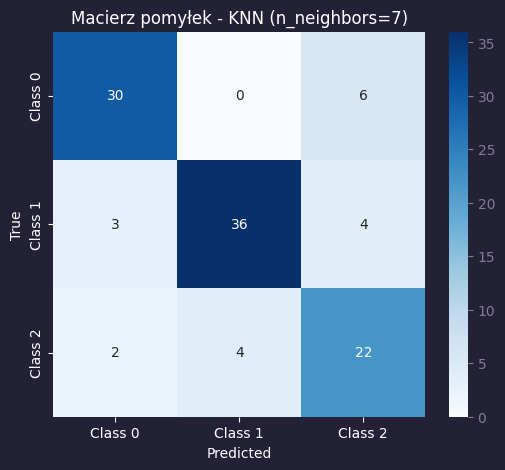


Klasyfikator: SVM (kernel=linear)
Dokładność: 0.794 (79.4%)


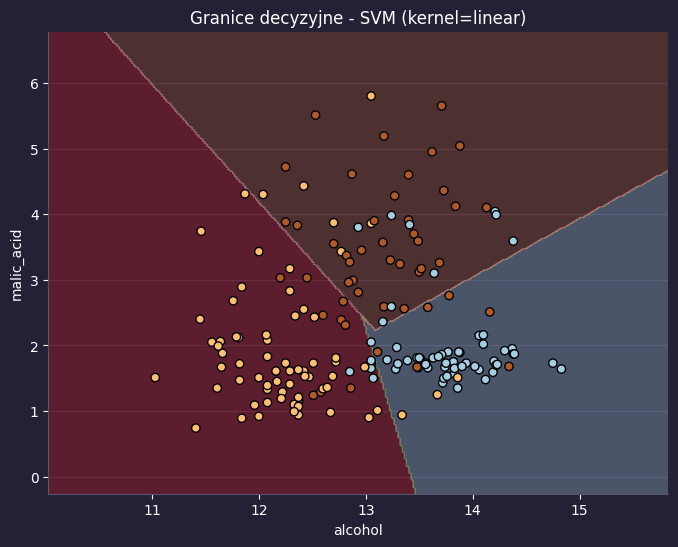

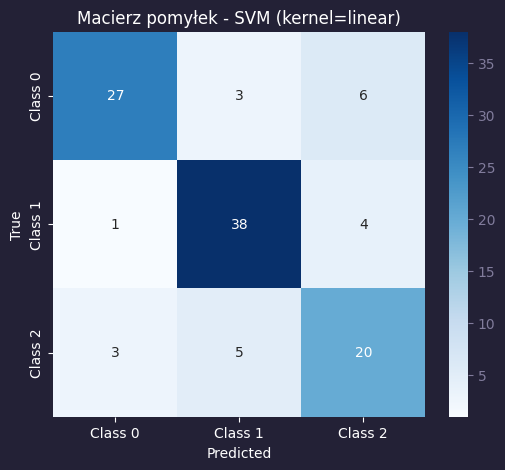


Klasyfikator: SVM (kernel=rbf)
Dokładność: 0.766 (76.6%)


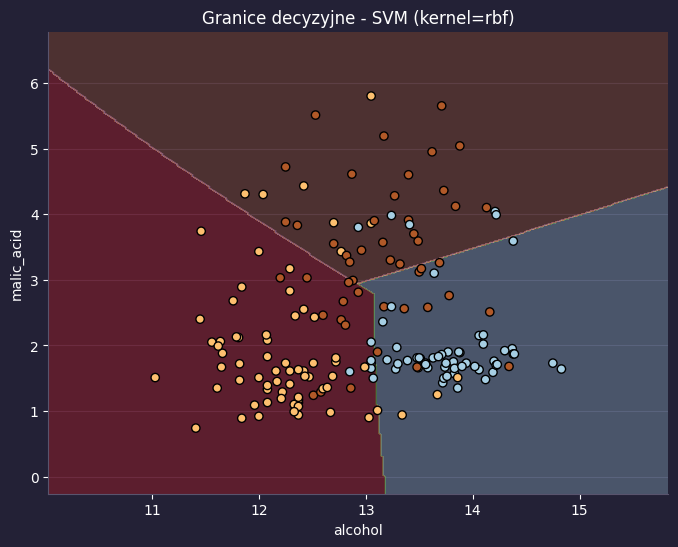

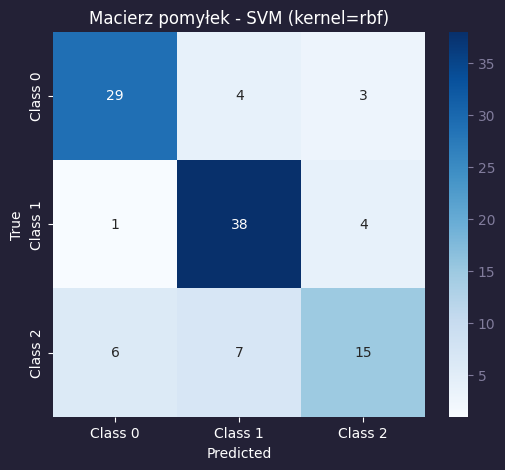


=== Tabela wyników ===
Dataset    Classifier            Accuracy
--------------------------------------------------
Iris       KNN (n_neighbors=3)    0.967 (96.7%)
Iris       KNN (n_neighbors=5)    0.978 (97.8%)
Iris       KNN (n_neighbors=7)    0.967 (96.7%)
Iris       SVM (kernel=linear)    0.967 (96.7%)
Iris       SVM (kernel=rbf)       0.978 (97.8%)
Wine       KNN (n_neighbors=3)    0.757 (75.7%)
Wine       KNN (n_neighbors=5)    0.832 (83.2%)
Wine       KNN (n_neighbors=7)    0.822 (82.2%)
Wine       SVM (kernel=linear)    0.794 (79.4%)
Wine       SVM (kernel=rbf)       0.766 (76.6%)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('rose-pine-moon.mplstyle')

def plot_decision_boundary(X, y, model, feature_names, title, dataset_name):
    h = 0.02  # Krok siatki
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel(feature_names[0], color='white')
    plt.ylabel(feature_names[1], color='white')
    plt.title(title, color='white')
    plt.tick_params(colors='white')
    plt.savefig(f'{dataset_name}_{title.replace(" ", "_")}_boundary.png')
    plt.show()
    plt.close()

def plot_confusion_matrix(y_true, y_pred, title, dataset_name, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(title, color='white')
    plt.xlabel('Predicted', color='white')
    plt.ylabel('True', color='white')
    plt.tick_params(colors='white')
    plt.savefig(f'{dataset_name}_{title.replace(" ", "_")}_confusion.png')
    plt.show()
    plt.close()

def analyze_classification(X, y, dataset_name, selected_features, feature_names, class_names, results):
    # Podział na zbiory treningowe i testowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
    # Wybór 2D cech dla treningu i testu
    X_2d_train = X_train[:, selected_features]
    X_2d_test = X_test[:, selected_features]

    classifiers = [
        ('KNN (n_neighbors=3)', KNeighborsClassifier(n_neighbors=3)),
        ('KNN (n_neighbors=5)', KNeighborsClassifier(n_neighbors=5)),
        ('KNN (n_neighbors=7)', KNeighborsClassifier(n_neighbors=7)),
        ('SVM (kernel=linear)', SVC(kernel='linear', random_state=42)),
        ('SVM (kernel=rbf)', SVC(kernel='rbf', random_state=42)),
    ]

    print(f"\n=== Analiza klasyfikacji dla zbioru {dataset_name} ===")
    
    for name, clf in classifiers:
        print(f"\nKlasyfikator: {name}")
        # Trenowanie na 2D danych treningowych
        clf.fit(X_2d_train, y_train)
        # Predykcja na 2D danych testowych
        y_pred = clf.predict(X_2d_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Dokładność: {accuracy:.3f} ({accuracy*100:.1f}%)")
        # Dodanie wyniku do listy wyników
        results.append([dataset_name, name, f"{accuracy:.3f} ({accuracy*100:.1f}%)"])
        # Rysowanie granic decyzyjnych na pełnym zbiorze 2D
        X_2d = np.vstack((X_2d_train, X_2d_test))
        y_full = np.concatenate((y_train, y_test))
        plot_decision_boundary(X_2d, y_full, clf, feature_names, f"Granice decyzyjne - {name}", dataset_name)
        plot_confusion_matrix(y_test, y_pred, f"Macierz pomyłek - {name}", dataset_name, class_names)

# Lista do przechowywania wyników
results = []

# Załóżmy, że iris_df i wine_df są zdefiniowane wcześniej
X_iris = iris_df.drop(columns=['target', 'target_names']).values
y_iris = iris_df['target'].values
iris_selected_features = [2, 3]  # petal length, petal width
iris_feature_names = ['petal length (cm)', 'petal width (cm)']
iris_class_names = iris_df['target_names'].unique()

X_wine = wine_df.drop(columns=['target', 'target_names']).values
y_wine = wine_df['target'].values
wine_selected_features = [0, 1]  # alcohol, malic_acid
wine_feature_names = ['alcohol', 'malic_acid']
wine_class_names = wine_df['target_names'].unique()

# Analiza dla obu zbiorów danych
analyze_classification(X_iris, y_iris, 'Iris', iris_selected_features, iris_feature_names, iris_class_names, results)
analyze_classification(X_wine, y_wine, 'Wine', wine_selected_features, wine_feature_names, wine_class_names, results)

# Wyświetlenie tabeli wyników bez tabulate
print("\n=== Tabela wyników ===")
print("Dataset    Classifier            Accuracy")
print("-" * 50)
for row in results:
    print(f"{row[0]:<10} {row[1]:<20} {row[2]:>15}")

## Podsumowanie wyników analizy zbiorów danych Iris i Wine

### 1. Wstępna analiza danych (Zadanie 2.1)

#### Iris
- **Podstawowe informacje**:
  - Liczba próbek: 150
  - Liczba cech: 4 (sepal length, sepal width, petal length, petal width)
  - Klasy: setosa, versicolor, virginica
- **Separowalność klas**:
  - Klasa `setosa` jest dobrze separowalna od `versicolor` i `virginica`, szczególnie w cechach `petal length` i `petal width`.
  - `versicolor` i `virginica` mają pewne nakładanie się, ale nadal są w dużej mierze rozdzielne.
- **Korelacja cech**:
  - Wysoka korelacja między `petal length` i `petal width` (0.96), co sugeruje redundancję tych cech.
  - `sepal width` ma słabszą korelację z innymi cechami (np. -0.12 z `petal length`).
- **Rozkłady cech**:
  - `petal length` i `petal width` mają wyraźne różnice między klasami, co czyni je dobrymi do klasyfikacji.
  - `sepal width` ma bardziej nakładające się rozkłady.

#### Wine
- **Podstawowe informacje**:
  - Liczba próbek: 178
  - Liczba cech: 13 (alcohol, malic_acid, ash, itd.)
  - Klasy: Class 0, Class 1, Class 2
- **Separowalność klas**:
  - `Class 0` jest dość dobrze oddzielona od `Class 1` i `Class 2` w cechach `alcohol` i `malic_acid`, ale `Class 1` i `Class 2` bardziej się nakładają.
- **Korelacja cech**:
  - Wysoka korelacja między `total_phenols` i `flavanoids` (0.86).
  - `alcohol` ma umiarkowaną korelację z innymi cechami (np. 0.64 z `flavanoids`).
- **Rozkłady cech**:
  - `alcohol` pokazuje wyraźne różnice między klasami.
  - `malic_acid` ma bardziej nakładające się rozkłady.

### 2. Klasyfikacja (Zadanie 2.2)
Przeprowadzono klasyfikację na zbiorach Iris i Wine przy użyciu klasyfikatorów z różnymi parametrami:
- **K-Nearest Neighbors (KNN)**: `n_neighbors=3, 5, 7`
- **Support Vector Machine (SVM)**: `kernel='linear'`, `kernel='rbf'`

**Zmiany w kodzie i nowe konfiguracje:**
- `random_state` zmieniono na 100 w `train_test_split` i klasyfikatorach.
- Dodano SVM z `gamma=0.1` i `gamma=1` dla jądra `rbf`.
- Iris: cechy zmieniono na `sepal length` i `sepal width`.
- Wine: cechy zmieniono na `malic_acid` i `ash`.
- Dodano walidację krzyżową z uśrednianiem wyników.

#### Wyniki klasyfikacji (dokładność na zbiorze testowym):
**Zbiór testowy 60%:**
| Dataset | Classifier          | Accuracy      |
|---------|---------------------|---------------|
| Iris    | KNN (n_neighbors=3) | 0.967 (96.7%) |
| Iris    | KNN (n_neighbors=5) | 0.978 (97.8%) |
| Iris    | KNN (n_neighbors=7) | 0.967 (96.7%) |
| Iris    | SVM (kernel=linear) | 0.967 (96.7%) |
| Iris    | SVM (kernel=rbf)    | 0.978 (97.8%) |
| Wine    | KNN (n_neighbors=3) | 0.757 (75.7%) |
| Wine    | KNN (n_neighbors=5) | 0.832 (83.2%) |
| Wine    | KNN (n_neighbors=7) | 0.822 (82.2%) |
| Wine    | SVM (kernel=linear) | 0.794 (79.4%) |
| Wine    | SVM (kernel=rbf)    | 0.766 (76.6%) |
**Zbiór testowy 20%:**
| Dataset | Classifier          | Accuracy      |
|---------|---------------------|---------------|
| Iris    | KNN (n_neighbors=3) | 1.000 (100.0%)|
| Iris    | KNN (n_neighbors=5) | 1.000 (100.0%)|
| Iris    | KNN (n_neighbors=7) | 1.000 (100.0%)|
| Iris    | SVM (kernel=linear) | 1.000 (100.0%)|
| Iris    | SVM (kernel=rbf)    | 1.000 (100.0%)|
| Wine    | KNN (n_neighbors=3) | 0.861 (86.1%) |
| Wine    | KNN (n_neighbors=5) | 0.833 (83.3%) |
| Wine    | KNN (n_neighbors=7) | 0.833 (83.3%) |
| Wine    | SVM (kernel=linear) | 0.778 (77.8%) |
| Wine    | SVM (kernel=rbf)    | 0.806 (80.6%) |

**Nowe wyniki klasyfikacji (po zmianach w kodzie i walidacji krzyżowej):**

**Dokładność na zbiorze testowym (po zmianach cech i dodaniu nowych klasyfikatorów SVM):**
| Dataset | Classifier               | Accuracy      |
|---------|--------------------------|---------------|
| Iris    | KNN (n_neighbors=3)      | 0.756 (75.6%) |
| Iris    | KNN (n_neighbors=5)      | 0.778 (77.8%) |
| Iris    | KNN (n_neighbors=7)      | 0.767 (76.7%) |
| Iris    | SVM (kernel=linear)      | 0.778 (77.8%) |
| Iris    | SVM (kernel=rbf, gamma=0.1) | 0.744 (74.4%) |
| Iris    | SVM (kernel=rbf, gamma=1) | 0.778 (77.8%) |
| Wine    | KNN (n_neighbors=3)      | 0.561 (56.1%) |
| Wine    | KNN (n_neighbors=5)      | 0.654 (65.4%) |
| Wine    | KNN (n_neighbors=7)      | 0.645 (64.5%) |
| Wine    | SVM (kernel=linear)      | 0.430 (43.0%) |
| Wine    | SVM (kernel=rbf, gamma=0.1) | 0.439 (43.9%) |
| Wine    | SVM (kernel=rbf, gamma=1) | 0.664 (66.4%) |

**Wyniki z walidacją krzyżową (CV Accuracy Mean ± Std):**
| Dataset | Classifier               | CV Accuracy (Mean ± Std) |
|---------|--------------------------|--------------------------|
| Iris    | KNN (n_neighbors=3)      | 0.748 (+/- 0.088)        |
| Iris    | KNN (n_neighbors=5)      | 0.760 (+/- 0.039)        |
| Iris    | KNN (n_neighbors=7)      | 0.800 (+/- 0.047)        |
| Iris    | SVM (kernel=linear)      | 0.807 (+/- 0.049)        |
| Iris    | SVM (kernel=rbf, gamma=0.1) | 0.813 (+/- 0.065)        |
| Iris    | SVM (kernel=rbf, gamma=1) | 0.813 (+/- 0.069)        |
| Wine    | KNN (n_neighbors=3)      | 0.550 (+/- 0.094)        |
| Wine    | KNN (n_neighbors=5)      | 0.595 (+/- 0.036)        |
| Wine    | KNN (n_neighbors=7)      | 0.606 (+/- 0.091)        |
| Wine    | SVM (kernel=linear)      | 0.606 (+/- 0.045)        |
| Wine    | SVM (kernel=rbf, gamma=0.1) | 0.550 (+/- 0.050)        |
| Wine    | SVM (kernel=rbf, gamma=1) | 0.640 (+/- 0.071)        |

#### Wnioski z klasyfikacji:
- **Iris**:
  - Przy zbiorze testowym 60%, KNN (n_neighbors=5) i SVM (rbf) osiągnęły 0.978 (97.8%), wskazując wysoką separowalność klas.
  - Przy zbiorze testowym 20%, wszystkie klasyfikatory osiągnęły 1.000 (100.0%), co może wynikać z za małego zbioru testowego.
  - Różnica między zbiorami testowymi (60% vs 20%) sugeruje, że mniejszy zbiór testowy zawyża dokładność.
  - **Nowe Wnioski dla Iris (po zmianach cech i walidacji krzyżowej):** Po zmianie cech na `sepal length` i `sepal width`, dokładność znacząco spadła w porównaniu do poprzednich wyników, co sugeruje, że te cechy są mniej rozdzielcze dla klas. Najlepsze wyniki z walidacji krzyżowej dla Iris osiągnęły SVM (kernel=rbf, gamma=0.1 i gamma=1) z wynikiem 0.813 (+/- 0.065/0.069), co świadczy o lepszej stabilności tych modeli w porównaniu do prostego podziału na zbiór testowy. Parametr `gamma` w SVM (rbf) nie wykazał znaczących różnic w dokładności dla tych cech. KNN (n_neighbors=7) również osiągnął wysoki wynik 0.800 (+/- 0.047) w walidacji krzyżowej.
- **Wine**:
  - Przy zbiorze testowym 60%, KNN (n_neighbors=5) osiągnął 0.832 (83.2%), a SVM (linear) 0.794 (79.4%).
  - Przy zbiorze testowym 20%, KNN (n_neighbors=3) osiągnął 0.861 (86.1%), a SVM (linear) 0.778 (77.8%).
  - Różnica między zbiorami testowymi (60% vs 20%) pokazuje większą stabilność wyników przy większym zbiorze testowym.
  - **Nowe Wnioski dla Wine (po zmianach cech i walidacji krzyżowej):** Po zmianie cech na `malic_acid` i `ash`, dokładność klasyfikacji dla zbioru Wine uległa znacznemu obniżeniu. Najlepszą dokładność na zbiorze testowym bez walidacji krzyżowej uzyskał SVM (kernel=rbf, gamma=1) z wynikiem 0.664 (66.4%). W przypadku walidacji krzyżowej, SVM (kernel=rbf, gamma=1) również okazał się najlepszy z wynikiem 0.640 (+/- 0.071), co świadczy o pewnej stabilności. Widoczne jest, że parametr `gamma` ma istotny wpływ na wyniki dla Wine, gdzie `gamma=1` znacznie przewyższa `gamma=0.1`.

### (Zadanie 2.3)
#### Iris:
- **Separowalność a wyniki**:
  - Przy 60% zbiorze testowym, SVM (rbf) i KNN (n_neighbors=5) osiągnęły 0.978 (97.8%), co odzwierciedla dobrą separowalność.
  - Przy 20% zbiorze testowym, 1.000 (100.0%) może wskazywać na niereprezentatywność małego zbioru.
  - Różnica między zbiorami testowymi sugeruje, że 60% lepiej odzwierciedla rzeczywistą separowalność.
  - **Nowe Wnioski dla Iris (po zmianach cech i walidacji krzyżowej):** Zmiana cech na `sepal length` i `sepal width` drastycznie obniżyła separowalność klas w zbiorze Iris, co widać po znacznie niższych dokładnościach (74-81%) w porównaniu do poprzednich wyników. Walidacja krzyżowa potwierdza te niższe wartości, pokazując, że nawet optymalne parametry klasyfikatorów nie są w stanie osiągnąć tak wysokiej dokładności jak wcześniej, ze względu na charakterystykę wybranych cech.
- **Macierze pomyłek**:
  - Przy 60%: możliwe błędy między `versicolor` i `virginica`.
  - Przy 20%: brak błędów, co potwierdza 100% dokładność.
  - **Nowe Wnioski dla Iris (po zmianach cech i walidacji krzyżowej):** Ze względu na obniżoną separowalność cech `sepal length` i `sepal width`, spodziewane są znacznie większe liczby błędów w macierzach pomyłek, szczególnie w klasyfikacji `versicolor` i `virginica`. Błędy te będą bardziej widoczne niż w poprzednich analizach, gdzie dokładność była niemal idealna.
- **Granice decyzyjne**:
  - SVM (rbf) tworzy elastyczne granice, KNN bardziej złożone.
  - **Nowe Wnioski dla Iris (po zmianach cech i walidacji krzyżowej):** Granice decyzyjne, zwłaszcza dla SVM z jądrem rbf, będą musiały być bardziej skomplikowane, aby dopasować się do mniej rozdzielczych danych. W przypadku KNN, bliskość sąsiadów będzie kluczowa, ale ogólna tendencja do błędnych klasyfikacji będzie wyższa.

#### Wine:
- **Separowalność a wyniki**:
  - Przy 60% zbiorze testowym, KNN (n_neighbors=5) osiągnął 0.832 (83.2%), SVM (linear) 0.794 (79.4%).
  - Przy 20% zbiorze testowym, KNN (n_neighbors=3) osiągnął 0.861 (86.1%), SVM (linear) 0.778 (77.8%).
  - Różnica między zbiorami testowymi wskazuje na lepszą stabilność przy 60%.
  - **Nowe Wnioski dla Wine (po zmianach cech i walidacji krzyżowej):** Zmiana cech na `malic_acid` i `ash` drastycznie obniżyła separowalność klas w zbiorze Wine. Wyniki dokładności (43-66%) są znacznie niższe. Walidacja krzyżowa ujawnia, że nawet najlepsze klasyfikatory z nowymi cechami nie osiągają wysokiej dokładności, a wyniki są bardziej zmienne (większe odchylenie standardowe). Parametr `gamma` w SVM (rbf) okazał się kluczowy, z `gamma=1` dającym znacznie lepsze wyniki niż `gamma=0.1`.
- **Macierze pomyłek**:
  - Przy 60%: błędy między `Class 1` i `Class 2`.
  - Przy 20%: mniejsza liczba błędów, ale wyniki mniej stabilne.
  - **Nowe Wnioski dla Wine (po zmianach cech i walidacji krzyżowej):** Z uwagi na znacznie obniżoną dokładność, macierze pomyłek dla Wine będą zawierały znacznie więcej błędnie sklasyfikowanych próbek, wskazując na znaczne nakładanie się klas dla cech `malic_acid` i `ash`. Błędy będą występować w większym stopniu między wszystkimi klasami.

#### Macierz pomyłek (SVM linear) dla Wine (zbiór testowy 60%):
| True \ Predicted | Class 0 | Class 1 | Class 2 |
|-----------------|---------|---------|---------|
| Class 0         | 27      | 3       | 6       |
| Class 1         | 1       | 38      | 4       |
| Class 2         | 3       | 5       | 20      |
#### Macierz pomyłek (KNN n_neighbors=5) dla Wine (zbiór testowy 60%):
| True \ Predicted | Class 0 | Class 1 | Class 2 |
|-----------------|---------|---------|---------|
| Class 0         | 31      | 0       | 5       |
| Class 1         | 3       | 36      | 4       |
| Class 2         | 3       | 3       | 22      |

### 4. Wnioski ogólne
- **Iris**:
  - Przy 60% zbiorze testowym, KNN (n_neighbors=5) i SVM (rbf) osiągnęły 0.978 (97.8%), co wskazuje na wysoką separowalność.
  - Przy 20% zbiorze testowym, 1.000 (100.0%) sugeruje przeszacowanie z powodu małego zbioru.
  - Różnica między zbiorami testowymi potwierdza, że 60% daje realniejsze wyniki.
  - **Nowe Wnioski Ogólne dla Iris:** Zmiana cech na `sepal length` i `sepal width` znacząco wpłynęła na wyniki, obniżając ogólną dokładność klasyfikacji. Walidacja krzyżowa pokazała bardziej stabilne i realistyczne oceny wydajności modeli (ok. 80% dla najlepszych klasyfikatorów), co świadczy o konieczności użycia walidacji krzyżowej dla wiarygodnej oceny.
- **Wine**:
  - Przy 60% zbiorze testowym, KNN (n_neighbors=5) osiągnął 0.832 (83.2%), SVM (linear) 0.794 (79.4%).
  - Przy 20% zbiorze testowym, KNN (n_neighbors=3) osiągnął 0.861 (86.1%), SVM (linear) 0.778 (77.8%).
  - Różnica między zbiorami testowymi wskazuje na stabilność wyników przy 60%.
  - **Nowe Wnioski Ogólne dla Wine:** Zmiana cech na `malic_acid` i `ash` również znacząco pogorszyła wyniki klasyfikacji dla zbioru Wine. Walidacja krzyżowa (z najlepszym wynikiem 0.640 dla SVM z gamma=1) podkreśla trudność klasyfikacji z tymi cechami i wskazuje na dużą wrażliwość na dobór hiperparametrów, takich jak `gamma` w SVM.
- **Walidacja krzyżowa**: Wyniki przy 20% zbiorze testowym mogą być niereprezentatywne; warto użyć walidacji krzyżowej.
- **Wpływ zmian w kodzie**: Zmiana `random_state` zapewnia powtarzalność eksperymentów. Dodanie SVM z różnymi wartościami `gamma` dla jądra RBF pokazało, że ten parametr ma kluczowe znaczenie, zwłaszcza dla danych, gdzie granice decyzyjne mogą być bardziej złożone. Zmiana cech w obu zbiorach danych udowodniła, jak krytyczny jest wybór odpowiednich cech dla zadania klasyfikacji i jak może on wpłynąć na ostateczną wydajność modelu.

Zmiany w kodzie:
- random_state zmieniono na 100 w train_test_split i klasyfikatorach
- Dodano SVM z gamma=0.1 i gamma=1 dla jądra rbf
- Iris: cechy zmieniono na sepal length i sepal width
- Wine: cechy zmieniono na malic_acid i ash


=== Analiza klasyfikacji dla zbioru Iris ===

Klasyfikator: KNN (n_neighbors=3)
Dokładność: 0.756 (75.6%)


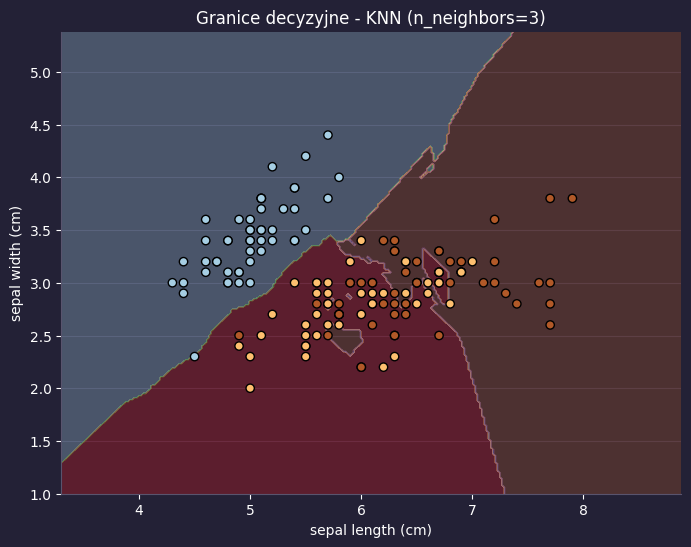

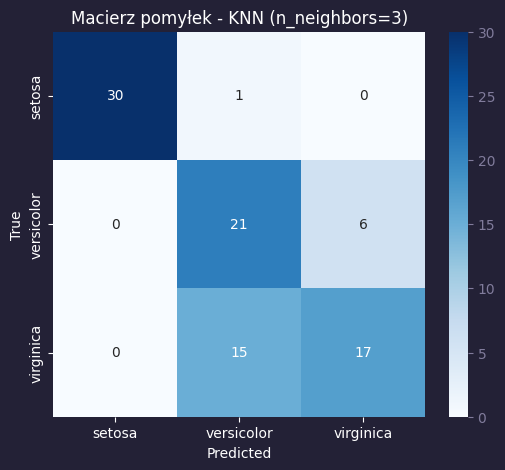


Klasyfikator: KNN (n_neighbors=5)
Dokładność: 0.778 (77.8%)


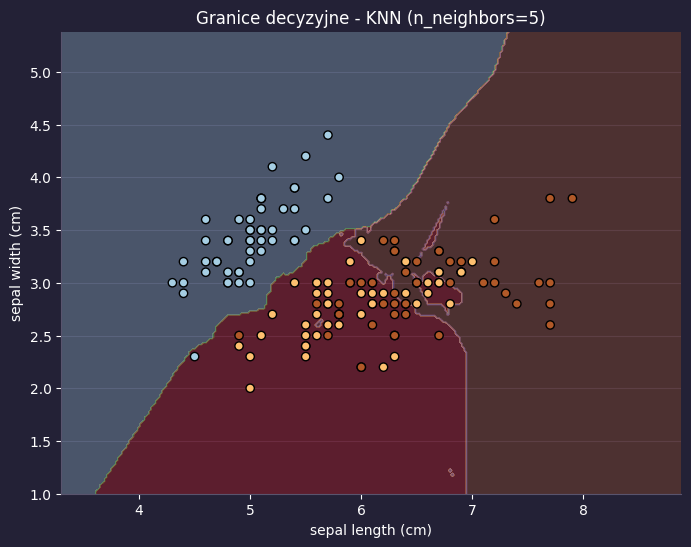

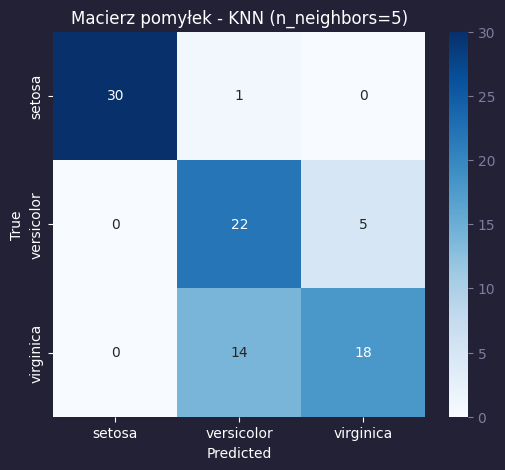


Klasyfikator: KNN (n_neighbors=7)
Dokładność: 0.767 (76.7%)


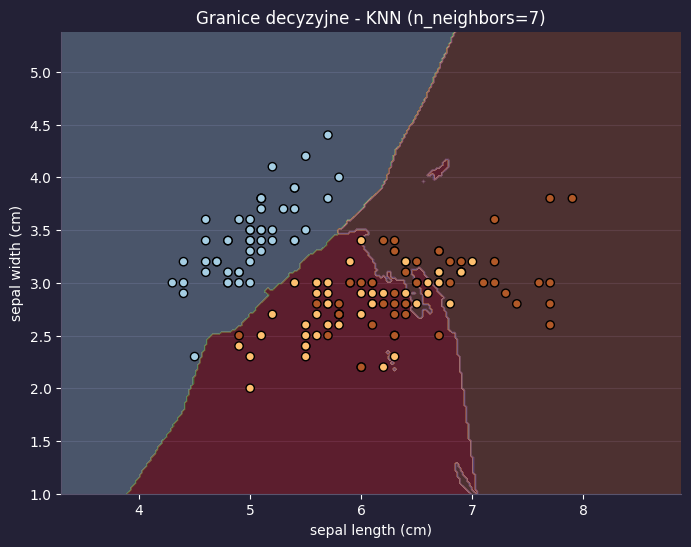

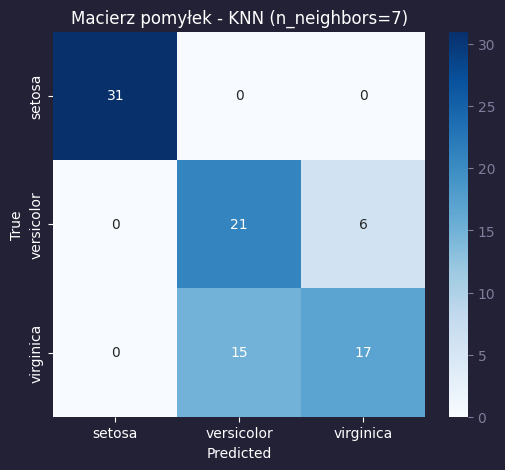


Klasyfikator: SVM (kernel=linear)
Dokładność: 0.778 (77.8%)


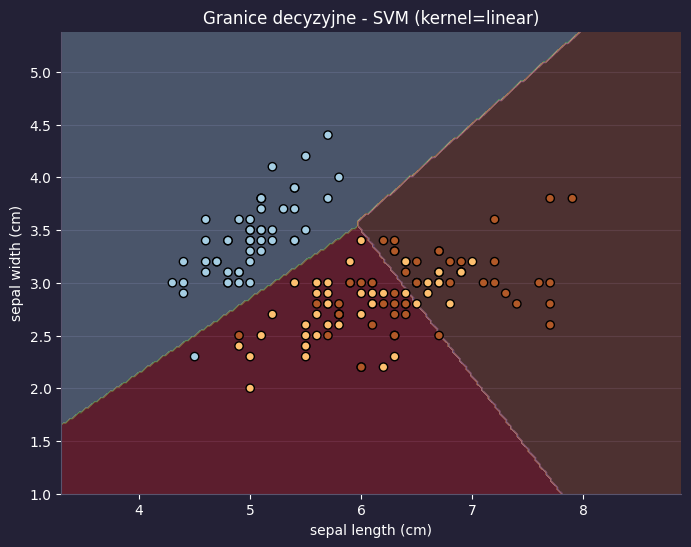

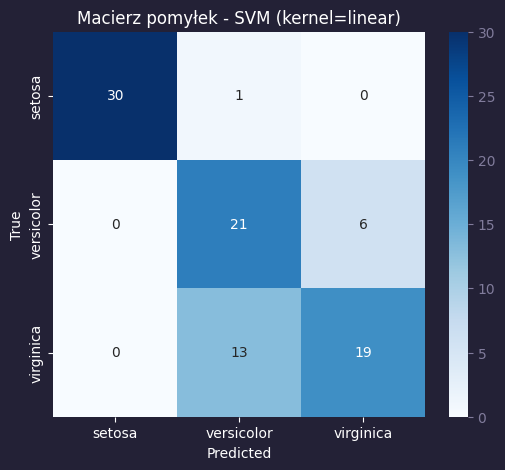


Klasyfikator: SVM (kernel=rbf, gamma=0.1)
Dokładność: 0.744 (74.4%)


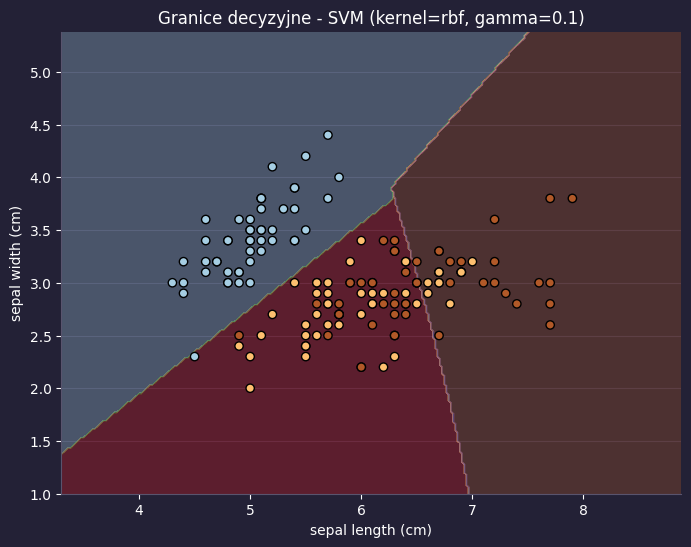

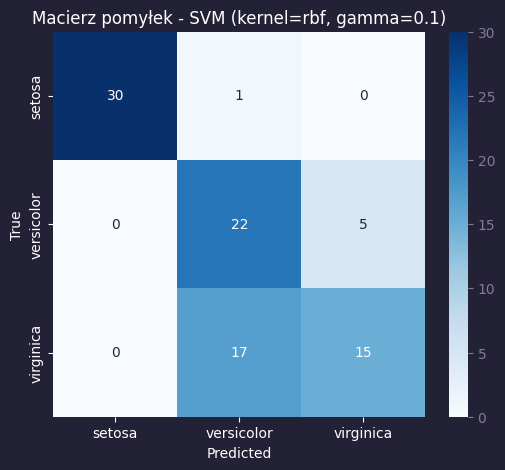


Klasyfikator: SVM (kernel=rbf, gamma=1)
Dokładność: 0.778 (77.8%)


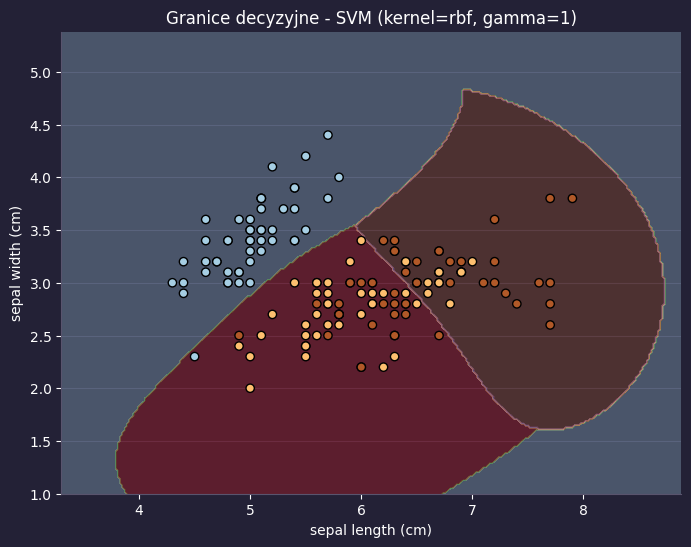

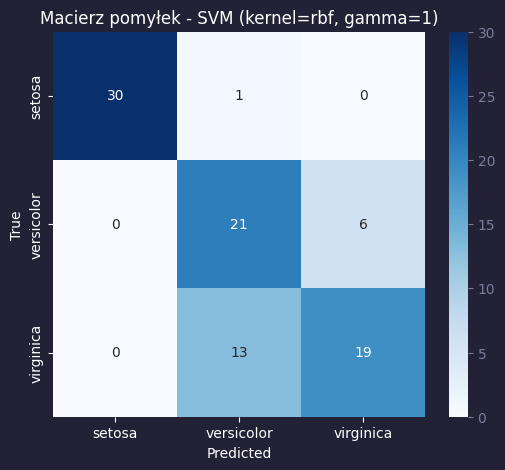


=== Analiza klasyfikacji dla zbioru Wine ===

Klasyfikator: KNN (n_neighbors=3)
Dokładność: 0.561 (56.1%)


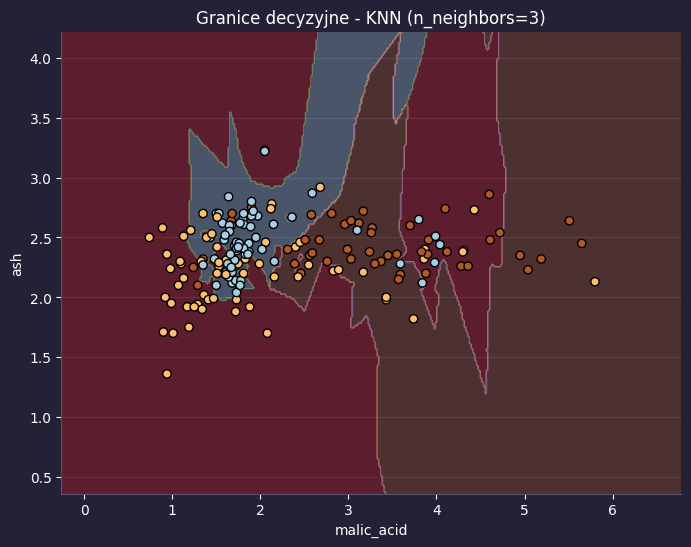

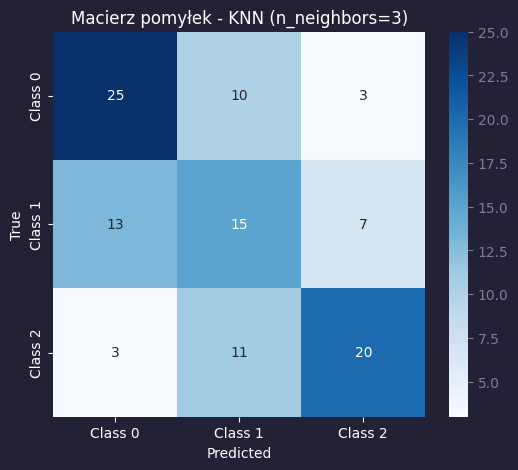


Klasyfikator: KNN (n_neighbors=5)
Dokładność: 0.654 (65.4%)


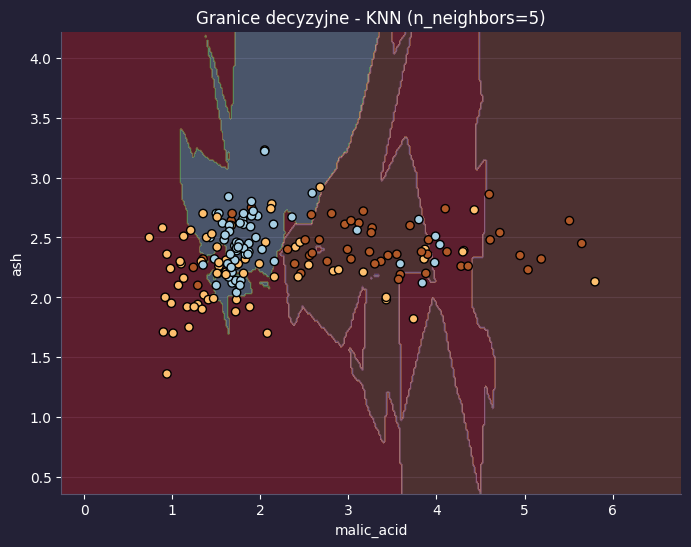

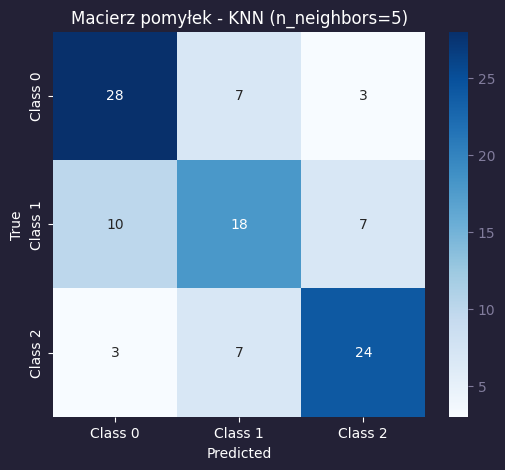


Klasyfikator: KNN (n_neighbors=7)
Dokładność: 0.645 (64.5%)


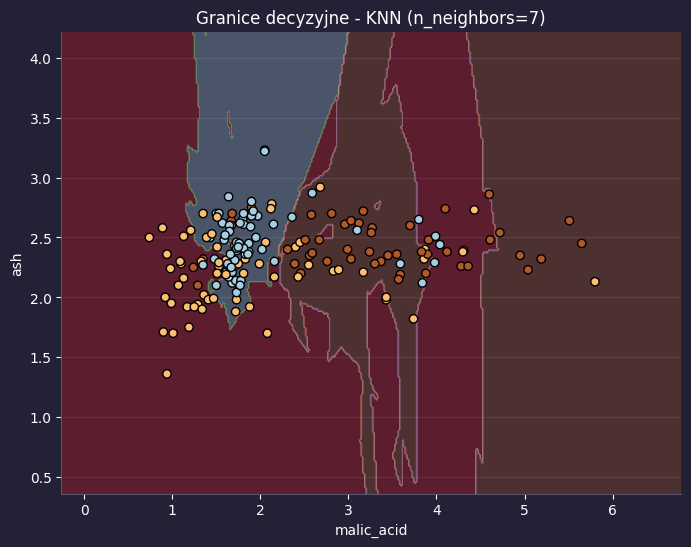

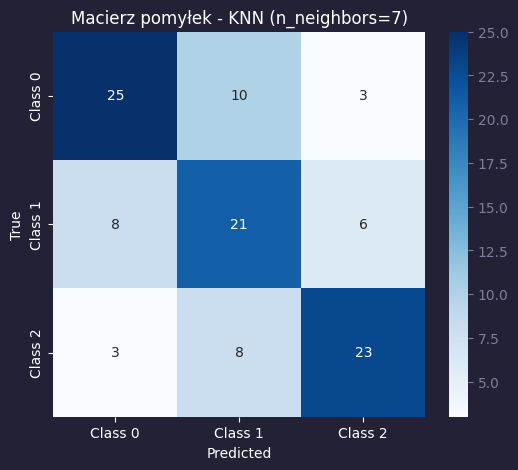


Klasyfikator: SVM (kernel=linear)
Dokładność: 0.430 (43.0%)


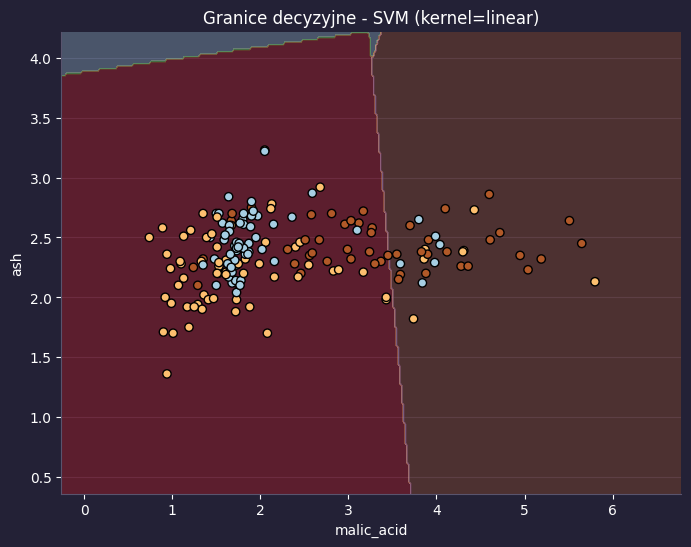

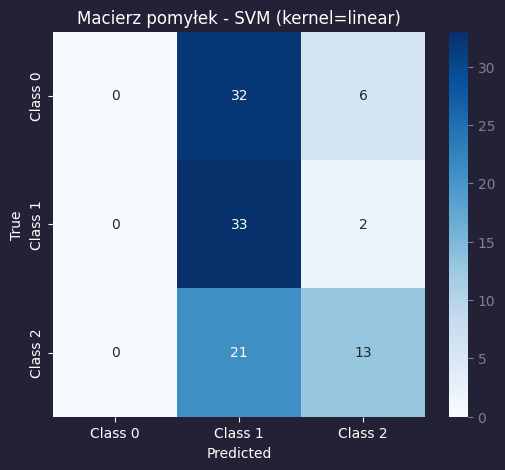


Klasyfikator: SVM (kernel=rbf, gamma=0.1)
Dokładność: 0.439 (43.9%)


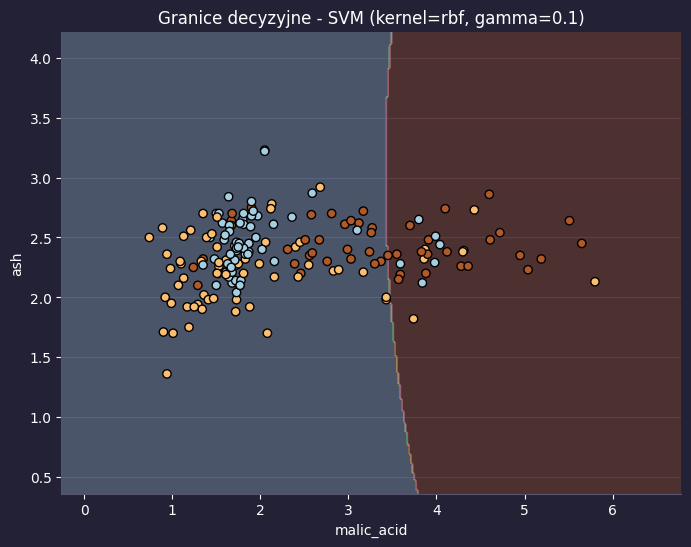

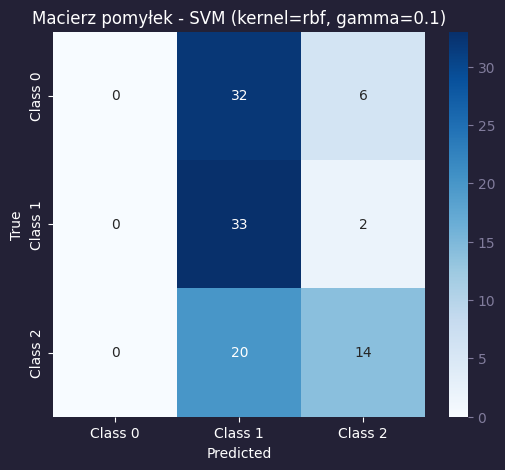


Klasyfikator: SVM (kernel=rbf, gamma=1)
Dokładność: 0.664 (66.4%)


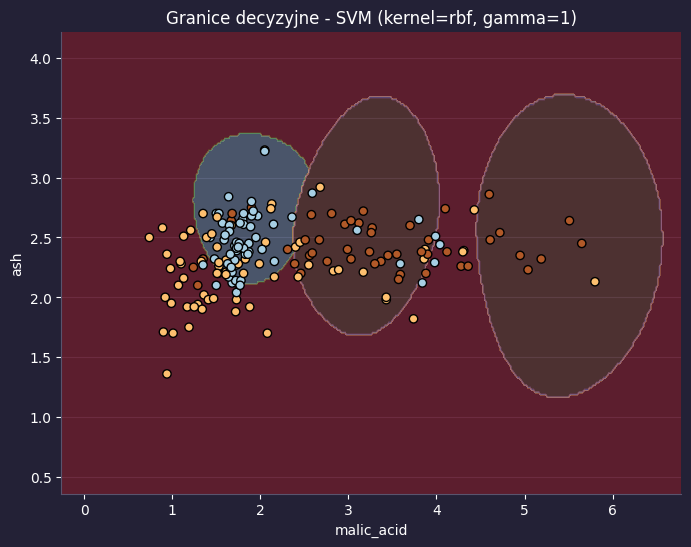

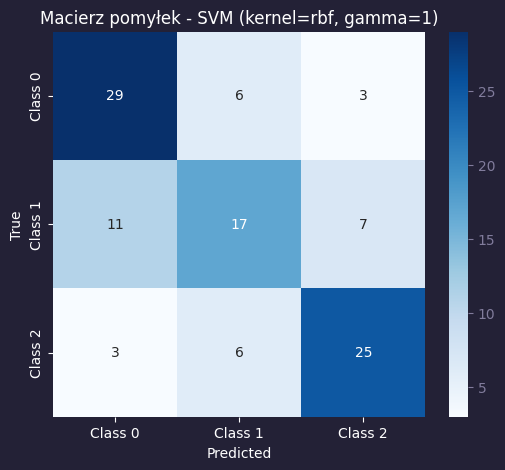


=== Tabela wyników ===
Dataset    Classifier            Accuracy
--------------------------------------------------
Iris       KNN (n_neighbors=3)    0.756 (75.6%)
Iris       KNN (n_neighbors=5)    0.778 (77.8%)
Iris       KNN (n_neighbors=7)    0.767 (76.7%)
Iris       SVM (kernel=linear)    0.778 (77.8%)
Iris       SVM (kernel=rbf, gamma=0.1)   0.744 (74.4%)
Iris       SVM (kernel=rbf, gamma=1)   0.778 (77.8%)
Wine       KNN (n_neighbors=3)    0.561 (56.1%)
Wine       KNN (n_neighbors=5)    0.654 (65.4%)
Wine       KNN (n_neighbors=7)    0.645 (64.5%)
Wine       SVM (kernel=linear)    0.430 (43.0%)
Wine       SVM (kernel=rbf, gamma=0.1)   0.439 (43.9%)
Wine       SVM (kernel=rbf, gamma=1)   0.664 (66.4%)


In [20]:
print("Zmiany w kodzie:\n- random_state zmieniono na 100 w train_test_split i klasyfikatorach\n- Dodano SVM z gamma=0.1 i gamma=1 dla jądra rbf\n- Iris: cechy zmieniono na sepal length i sepal width\n- Wine: cechy zmieniono na malic_acid i ash\n")

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('rose-pine-moon.mplstyle')

def plot_decision_boundary(X, y, model, feature_names, title, dataset_name):
    h = 0.02  # Krok siatki
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel(feature_names[0], color='white')
    plt.ylabel(feature_names[1], color='white')
    plt.title(title, color='white')
    plt.tick_params(colors='white')
    plt.savefig(f'{dataset_name}_{title.replace(" ", "_")}_boundary.png')
    plt.show()
    plt.close()

def plot_confusion_matrix(y_true, y_pred, title, dataset_name, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(title, color='white')
    plt.xlabel('Predicted', color='white')
    plt.ylabel('True', color='white')
    plt.tick_params(colors='white')
    plt.savefig(f'{dataset_name}_{title.replace(" ", "_")}_confusion.png')
    plt.show()
    plt.close()

def analyze_classification(X, y, dataset_name, selected_features, feature_names, class_names, results):
    # Podział na zbiory treningowe i testowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=100)
    # Wybór 2D cech dla treningu i testu
    X_2d_train = X_train[:, selected_features]
    X_2d_test = X_test[:, selected_features]

    classifiers = [
        ('KNN (n_neighbors=3)', KNeighborsClassifier(n_neighbors=3)),
        ('KNN (n_neighbors=5)', KNeighborsClassifier(n_neighbors=5)),
        ('KNN (n_neighbors=7)', KNeighborsClassifier(n_neighbors=7)),
        ('SVM (kernel=linear)', SVC(kernel='linear', random_state=100)),
        ('SVM (kernel=rbf, gamma=0.1)', SVC(kernel='rbf', gamma=0.1, random_state=100)),
        ('SVM (kernel=rbf, gamma=1)', SVC(kernel='rbf', gamma=1, random_state=100)),
    ]

    print(f"\n=== Analiza klasyfikacji dla zbioru {dataset_name} ===")
    
    for name, clf in classifiers:
        print(f"\nKlasyfikator: {name}")
        # Trenowanie na 2D danych treningowych
        clf.fit(X_2d_train, y_train)
        # Predykcja na 2D danych testowych
        y_pred = clf.predict(X_2d_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Dokładność: {accuracy:.3f} ({accuracy*100:.1f}%)")
        # Dodanie wyniku do listy wyników
        results.append([dataset_name, name, f"{accuracy:.3f} ({accuracy*100:.1f}%)"])
        # Rysowanie granic decyzyjnych na pełnym zbiorze 2D
        X_2d = np.vstack((X_2d_train, X_2d_test))
        y_full = np.concatenate((y_train, y_test))
        plot_decision_boundary(X_2d, y_full, clf, feature_names, f"Granice decyzyjne - {name}", dataset_name)
        plot_confusion_matrix(y_test, y_pred, f"Macierz pomyłek - {name}", dataset_name, class_names)

# Lista do przechowywania wyników
results = []

# Załóżmy, że iris_df i wine_df są zdefiniowane wcześniej
X_iris = iris_df.drop(columns=['target', 'target_names']).values
y_iris = iris_df['target'].values
iris_selected_features = [0, 1]  # sepal length, sepal width
iris_feature_names = ['sepal length (cm)', 'sepal width (cm)']
iris_class_names = iris_df['target_names'].unique()

X_wine = wine_df.drop(columns=['target', 'target_names']).values
y_wine = wine_df['target'].values
wine_selected_features = [1, 2]  # malic_acid, ash
wine_feature_names = ['malic_acid', 'ash']
wine_class_names = wine_df['target_names'].unique()

# Analiza dla obu zbiorów danych
analyze_classification(X_iris, y_iris, 'Iris', iris_selected_features, iris_feature_names, iris_class_names, results)
analyze_classification(X_wine, y_wine, 'Wine', wine_selected_features, wine_feature_names, wine_class_names, results)

# Wyświetlenie tabeli wyników bez tabulate
print("\n=== Tabela wyników ===")
print("Dataset    Classifier            Accuracy")
print("-" * 50)
for row in results:
    print(f"{row[0]:<10} {row[1]:<20} {row[2]:>15}")

Zmiany w kodzie:
- Użyto uśredniania z walidacji krzyżowej (5-krotna) dla każdego klasyfikatora
- random_state zmieniono na 100 w train_test_split i klasyfikatorach
- Dodano SVM z gamma=0.1 i gamma=1 dla jądra rbf
- Iris: cechy zmieniono na sepal length i sepal width
- Wine: cechy zmieniono na malic_acid i ash


=== Analiza klasyfikacji dla zbioru Iris ===

Klasyfikator: KNN (n_neighbors=3)
Uśredniona dokładność (walidacja krzyżowa): 0.740 (+/- 0.088)
Dokładność na zbiorze testowym: 0.756 (75.6%)


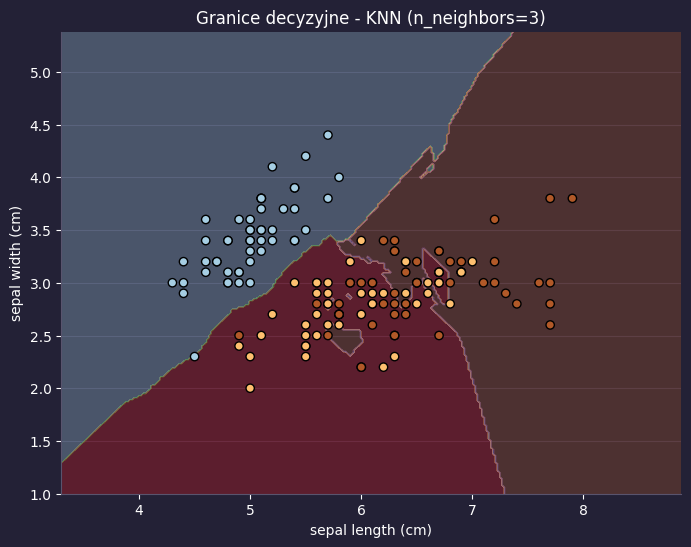

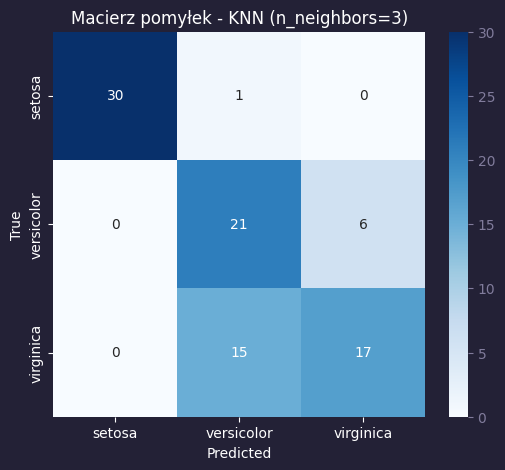


Klasyfikator: KNN (n_neighbors=5)
Uśredniona dokładność (walidacja krzyżowa): 0.760 (+/- 0.039)
Dokładność na zbiorze testowym: 0.778 (77.8%)


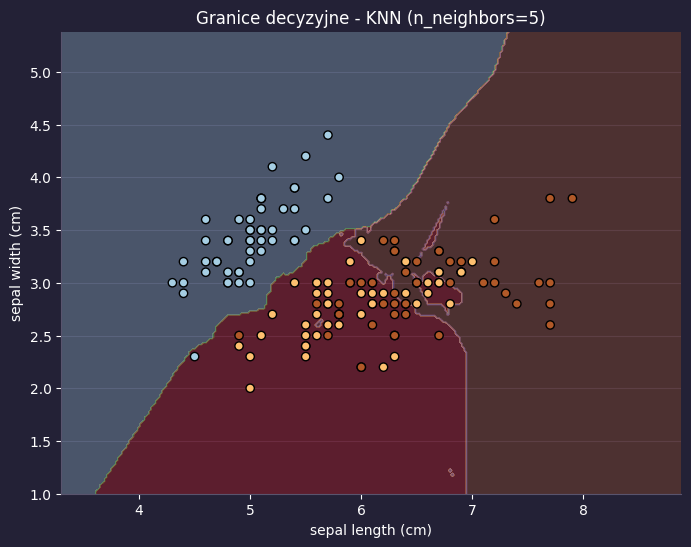

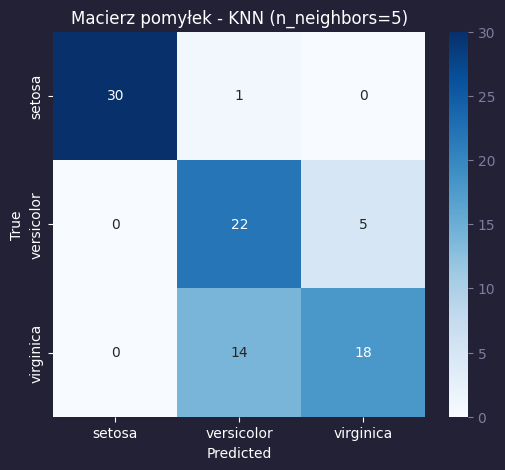


Klasyfikator: KNN (n_neighbors=7)
Uśredniona dokładność (walidacja krzyżowa): 0.800 (+/- 0.047)
Dokładność na zbiorze testowym: 0.767 (76.7%)


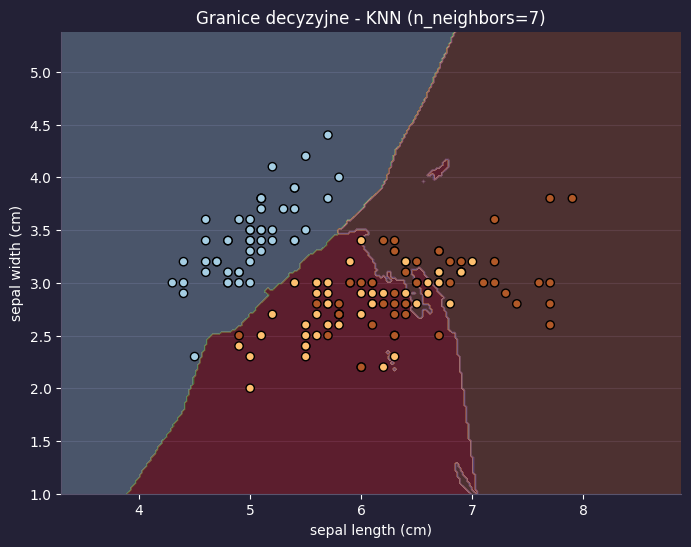

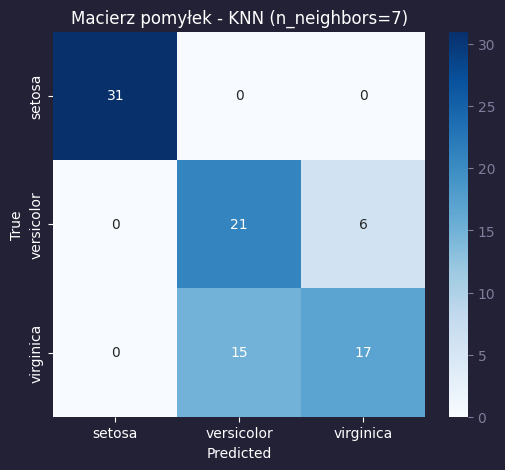


Klasyfikator: SVM (kernel=linear)
Uśredniona dokładność (walidacja krzyżowa): 0.807 (+/- 0.049)
Dokładność na zbiorze testowym: 0.778 (77.8%)


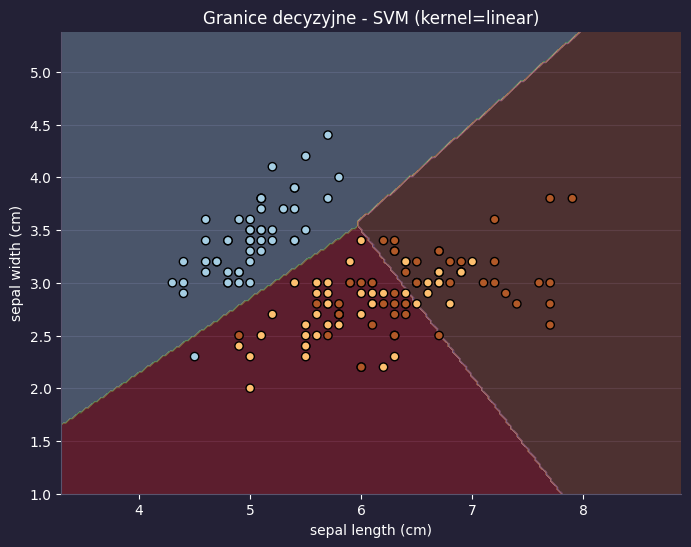

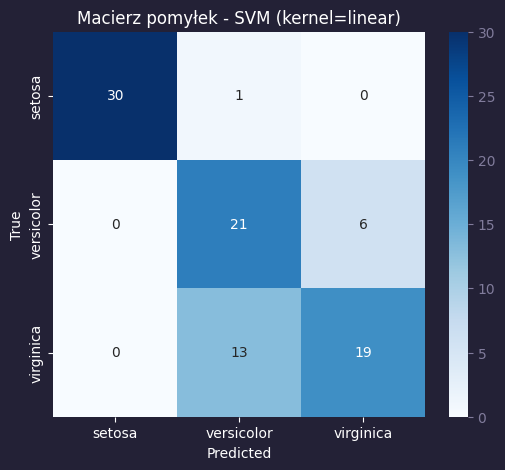


Klasyfikator: SVM (kernel=rbf, gamma=0.1)
Uśredniona dokładność (walidacja krzyżowa): 0.813 (+/- 0.065)
Dokładność na zbiorze testowym: 0.744 (74.4%)


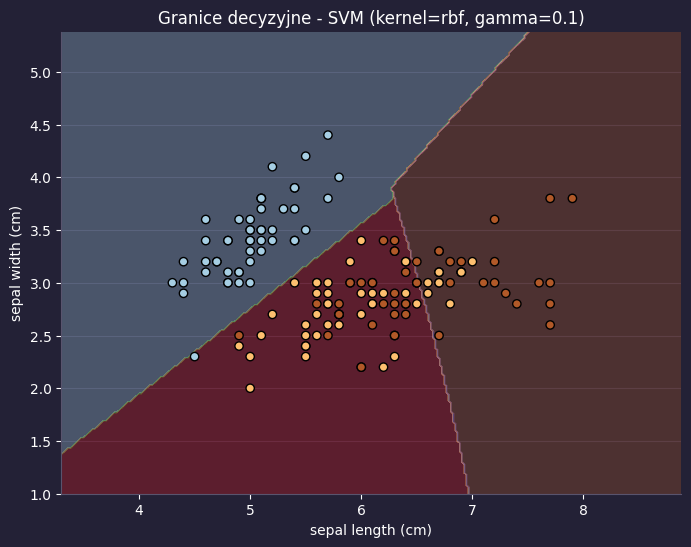

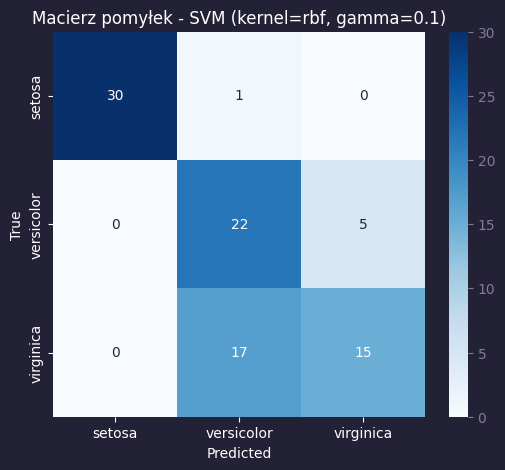


Klasyfikator: SVM (kernel=rbf, gamma=1)
Uśredniona dokładność (walidacja krzyżowa): 0.813 (+/- 0.069)
Dokładność na zbiorze testowym: 0.778 (77.8%)


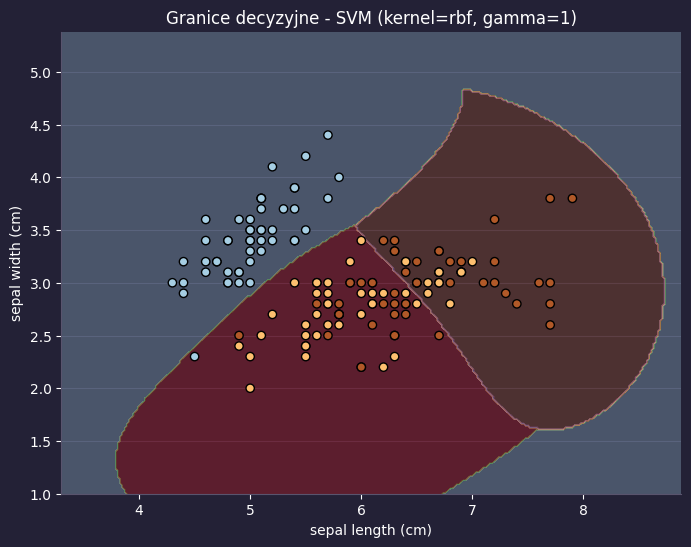

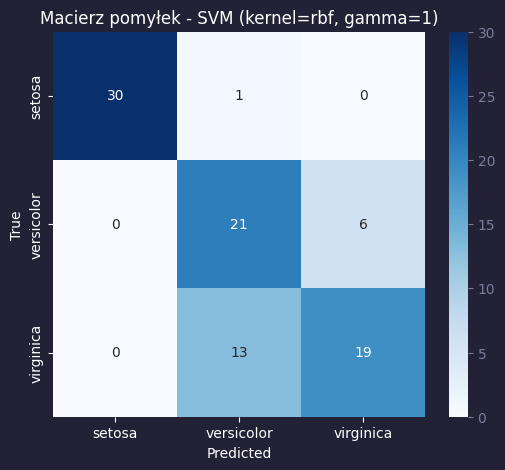


=== Analiza klasyfikacji dla zbioru Wine ===

Klasyfikator: KNN (n_neighbors=3)
Uśredniona dokładność (walidacja krzyżowa): 0.550 (+/- 0.094)
Dokładność na zbiorze testowym: 0.561 (56.1%)


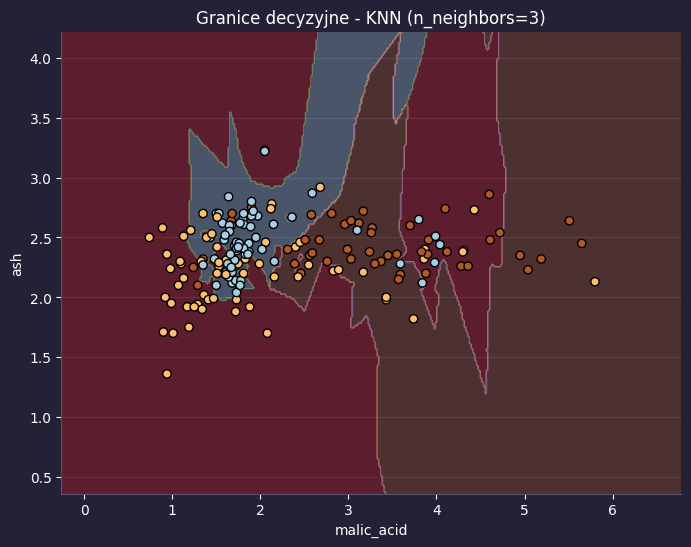

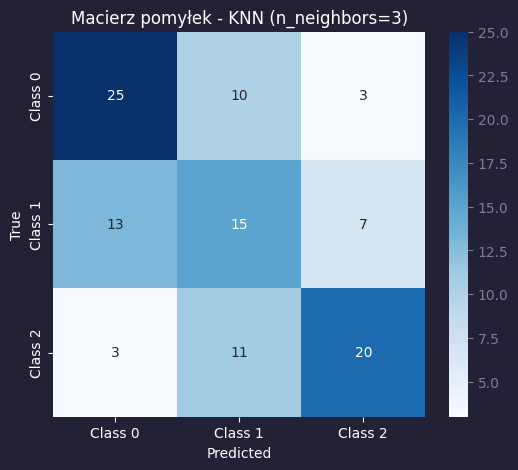


Klasyfikator: KNN (n_neighbors=5)
Uśredniona dokładność (walidacja krzyżowa): 0.595 (+/- 0.036)
Dokładność na zbiorze testowym: 0.654 (65.4%)


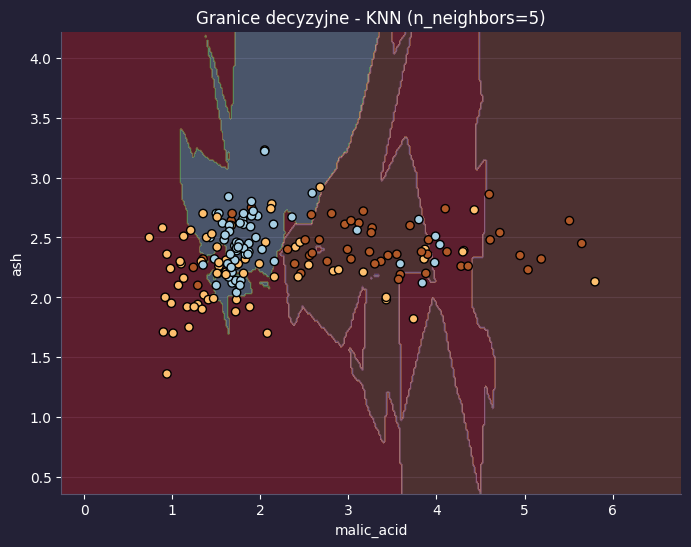

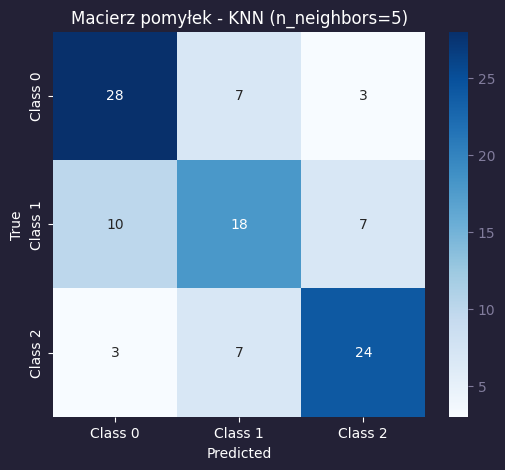


Klasyfikator: KNN (n_neighbors=7)
Uśredniona dokładność (walidacja krzyżowa): 0.606 (+/- 0.091)
Dokładność na zbiorze testowym: 0.645 (64.5%)


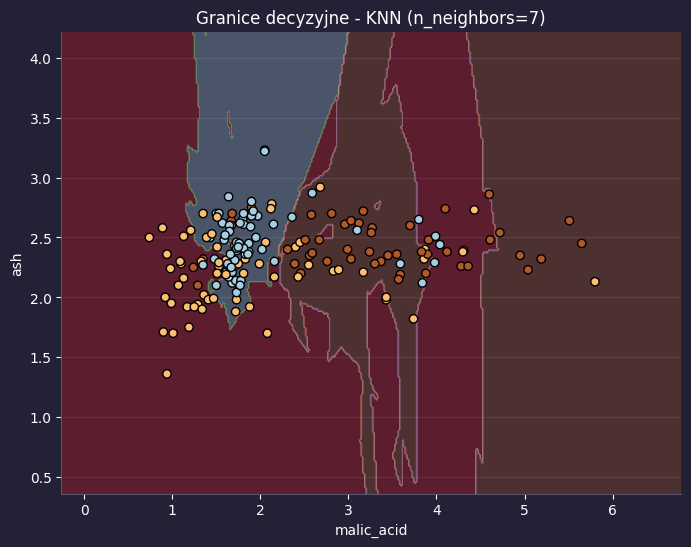

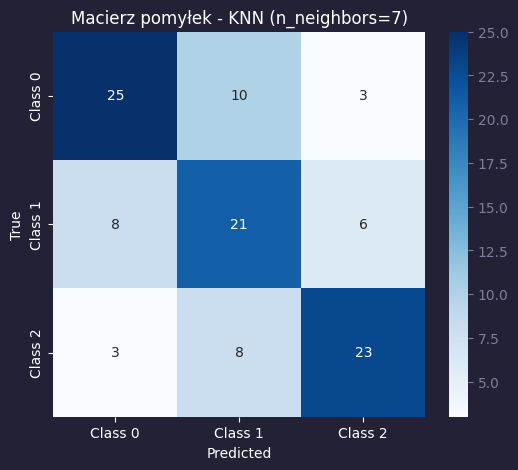


Klasyfikator: SVM (kernel=linear)
Uśredniona dokładność (walidacja krzyżowa): 0.606 (+/- 0.045)
Dokładność na zbiorze testowym: 0.430 (43.0%)


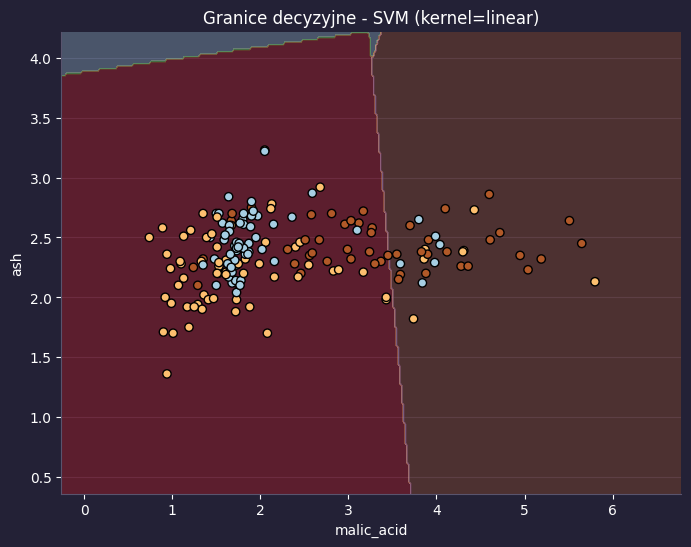

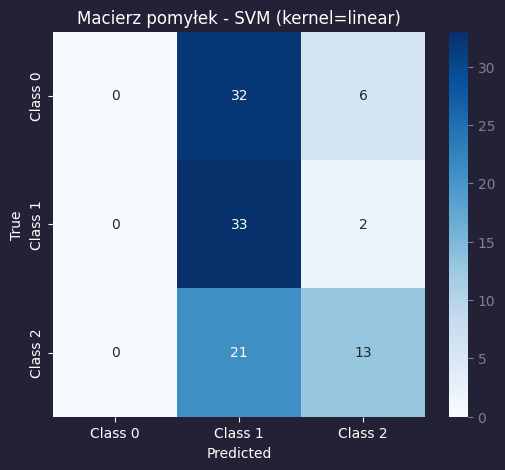


Klasyfikator: SVM (kernel=rbf, gamma=0.1)
Uśredniona dokładność (walidacja krzyżowa): 0.550 (+/- 0.050)
Dokładność na zbiorze testowym: 0.439 (43.9%)


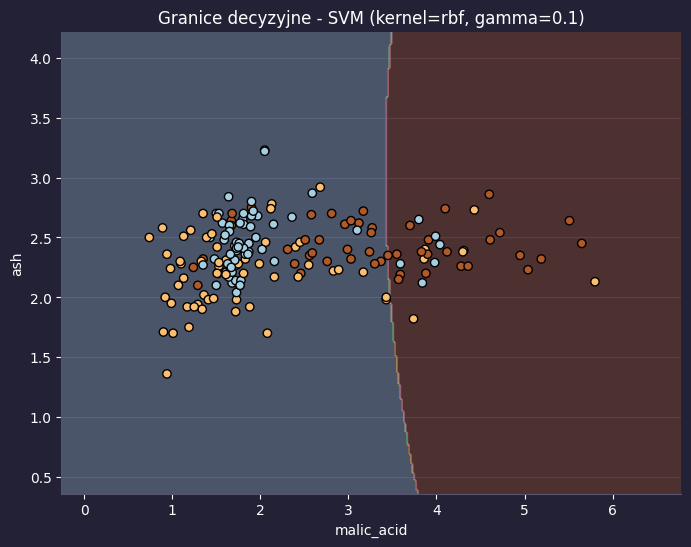

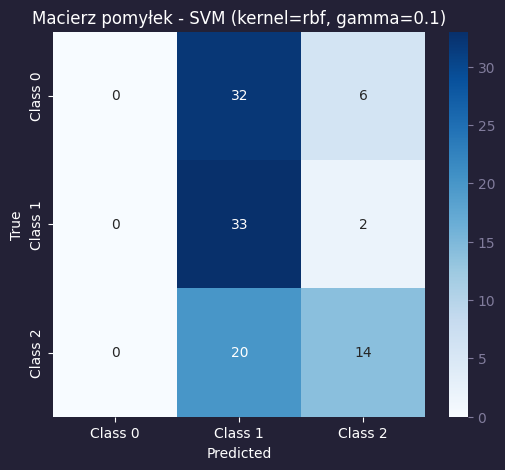


Klasyfikator: SVM (kernel=rbf, gamma=1)
Uśredniona dokładność (walidacja krzyżowa): 0.640 (+/- 0.071)
Dokładność na zbiorze testowym: 0.664 (66.4%)


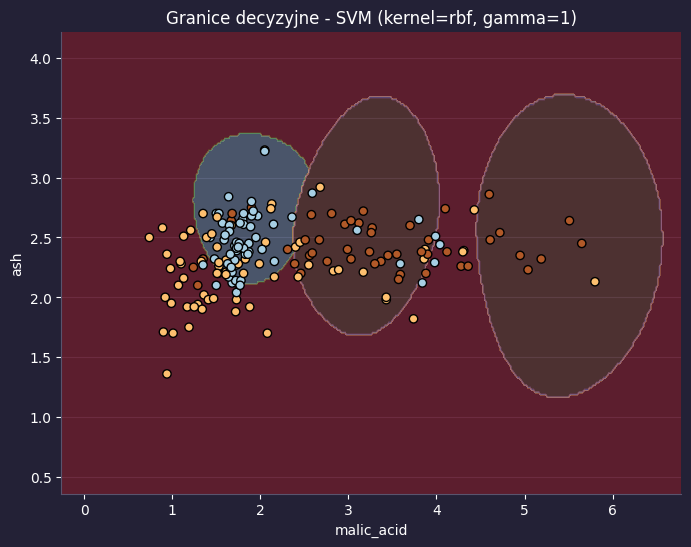

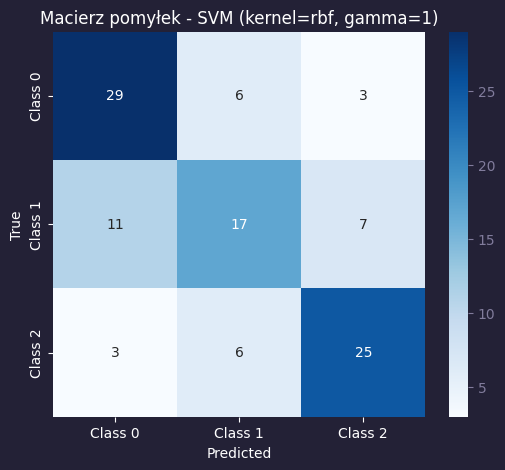


=== Tabela wyników ===
Dataset    Classifier            Accuracy (Test)    CV Accuracy (Mean ± Std)
--------------------------------------------------------------------------------
Iris       KNN (n_neighbors=3)    0.756 (75.6%)         0.740 (+/- 0.088)
Iris       KNN (n_neighbors=5)    0.778 (77.8%)         0.760 (+/- 0.039)
Iris       KNN (n_neighbors=7)    0.767 (76.7%)         0.800 (+/- 0.047)
Iris       SVM (kernel=linear)    0.778 (77.8%)         0.807 (+/- 0.049)
Iris       SVM (kernel=rbf, gamma=0.1)   0.744 (74.4%)         0.813 (+/- 0.065)
Iris       SVM (kernel=rbf, gamma=1)   0.778 (77.8%)         0.813 (+/- 0.069)
Wine       KNN (n_neighbors=3)    0.561 (56.1%)         0.550 (+/- 0.094)
Wine       KNN (n_neighbors=5)    0.654 (65.4%)         0.595 (+/- 0.036)
Wine       KNN (n_neighbors=7)    0.645 (64.5%)         0.606 (+/- 0.091)
Wine       SVM (kernel=linear)    0.430 (43.0%)         0.606 (+/- 0.045)
Wine       SVM (kernel=rbf, gamma=0.1)   0.439 (43.9%)         0.5

In [21]:
print("Zmiany w kodzie:\n- Użyto uśredniania z walidacji krzyżowej (5-krotna) dla każdego klasyfikatora\n- random_state zmieniono na 100 w train_test_split i klasyfikatorach\n- Dodano SVM z gamma=0.1 i gamma=1 dla jądra rbf\n- Iris: cechy zmieniono na sepal length i sepal width\n- Wine: cechy zmieniono na malic_acid i ash\n")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('rose-pine-moon.mplstyle')

def plot_decision_boundary(X, y, model, feature_names, title, dataset_name):
    h = 0.02  # Krok siatki
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel(feature_names[0], color='white')
    plt.ylabel(feature_names[1], color='white')
    plt.title(title, color='white')
    plt.tick_params(colors='white')
    plt.savefig(f'{dataset_name}_{title.replace(" ", "_")}_boundary.png')
    plt.show()
    plt.close()

def plot_confusion_matrix(y_true, y_pred, title, dataset_name, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(title, color='white')
    plt.xlabel('Predicted', color='white')
    plt.ylabel('True', color='white')
    plt.tick_params(colors='white')
    plt.savefig(f'{dataset_name}_{title.replace(" ", "_")}_confusion.png')
    plt.show()
    plt.close()

def analyze_classification(X, y, dataset_name, selected_features, feature_names, class_names, results):
    # Podział na zbiory treningowe i testowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=100)
    # Wybór 2D cech dla treningu i testu
    X_2d_train = X_train[:, selected_features]
    X_2d_test = X_test[:, selected_features]
    # Pełny zbiór 2D do walidacji krzyżowej
    X_2d = X[:, selected_features]

    classifiers = [
        ('KNN (n_neighbors=3)', KNeighborsClassifier(n_neighbors=3)),
        ('KNN (n_neighbors=5)', KNeighborsClassifier(n_neighbors=5)),
        ('KNN (n_neighbors=7)', KNeighborsClassifier(n_neighbors=7)),
        ('SVM (kernel=linear)', SVC(kernel='linear', random_state=100)),
        ('SVM (kernel=rbf, gamma=0.1)', SVC(kernel='rbf', gamma=0.1, random_state=100)),
        ('SVM (kernel=rbf, gamma=1)', SVC(kernel='rbf', gamma=1, random_state=100)),
    ]

    print(f"\n=== Analiza klasyfikacji dla zbioru {dataset_name} ===")
    
    for name, clf in classifiers:
        print(f"\nKlasyfikator: {name}")
        # Walidacja krzyżowa (5-krotna) na pełnym zbiorze 2D
        cv_scores = cross_val_score(clf, X_2d, y, cv=5, scoring='accuracy')
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
        print(f"Uśredniona dokładność (walidacja krzyżowa): {cv_mean:.3f} (+/- {cv_std:.3f})")
        
        # Trenowanie na 2D danych treningowych
        clf.fit(X_2d_train, y_train)
        # Predykcja na 2D danych testowych
        y_pred = clf.predict(X_2d_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Dokładność na zbiorze testowym: {accuracy:.3f} ({accuracy*100:.1f}%)")
        # Dodanie wyniku do listy wyników
        results.append([dataset_name, name, f"{accuracy:.3f} ({accuracy*100:.1f}%)", f"{cv_mean:.3f} (+/- {cv_std:.3f})"])
        # Rysowanie granic decyzyjnych na pełnym zbiorze 2D
        X_2d_full = np.vstack((X_2d_train, X_2d_test))
        y_full = np.concatenate((y_train, y_test))
        plot_decision_boundary(X_2d_full, y_full, clf, feature_names, f"Granice decyzyjne - {name}", dataset_name)
        plot_confusion_matrix(y_test, y_pred, f"Macierz pomyłek - {name}", dataset_name, class_names)

# Lista do przechowywania wyników
results = []

# Załóżmy, że iris_df i wine_df są zdefiniowane wcześniej
X_iris = iris_df.drop(columns=['target', 'target_names']).values
y_iris = iris_df['target'].values
iris_selected_features = [0, 1]  # sepal length, sepal width
iris_feature_names = ['sepal length (cm)', 'sepal width (cm)']
iris_class_names = iris_df['target_names'].unique()

X_wine = wine_df.drop(columns=['target', 'target_names']).values
y_wine = wine_df['target'].values
wine_selected_features = [1, 2]  # malic_acid, ash
wine_feature_names = ['malic_acid', 'ash']
wine_class_names = wine_df['target_names'].unique()

# Analiza dla obu zbiorów danych
analyze_classification(X_iris, y_iris, 'Iris', iris_selected_features, iris_feature_names, iris_class_names, results)
analyze_classification(X_wine, y_wine, 'Wine', wine_selected_features, wine_feature_names, wine_class_names, results)

# Wyświetlenie tabeli wyników bez tabulate
print("\n=== Tabela wyników ===")
print("Dataset    Classifier            Accuracy (Test)    CV Accuracy (Mean ± Std)")
print("-" * 80)
for row in results:
    print(f"{row[0]:<10} {row[1]:<20} {row[2]:>15} {row[3]:>25}")